# **MNIST Dataset Analysis**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import time
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Loading MNIST dataset...


In [4]:
print("\n--- DATASET EXPLORATION ---")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"Data type: {x_train.dtype}")
print(f"Min pixel value: {x_train.min()}")
print(f"Max pixel value: {x_train.max()}")


--- DATASET EXPLORATION ---
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8
Min pixel value: 0
Max pixel value: 255


In [5]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nClass distribution in training set:")
for digit, count in zip(unique_train, counts_train):
    print(f"Digit {digit}: {count} images ({count/len(y_train)*100:.2f}%)")

print("\nClass distribution in test set:")
for digit, count in zip(unique_test, counts_test):
    print(f"Digit {digit}: {count} images ({count/len(y_test)*100:.2f}%)")


Class distribution in training set:
Digit 0: 5923 images (9.87%)
Digit 1: 6742 images (11.24%)
Digit 2: 5958 images (9.93%)
Digit 3: 6131 images (10.22%)
Digit 4: 5842 images (9.74%)
Digit 5: 5421 images (9.04%)
Digit 6: 5918 images (9.86%)
Digit 7: 6265 images (10.44%)
Digit 8: 5851 images (9.75%)
Digit 9: 5949 images (9.92%)

Class distribution in test set:
Digit 0: 980 images (9.80%)
Digit 1: 1135 images (11.35%)
Digit 2: 1032 images (10.32%)
Digit 3: 1010 images (10.10%)
Digit 4: 982 images (9.82%)
Digit 5: 892 images (8.92%)
Digit 6: 958 images (9.58%)
Digit 7: 1028 images (10.28%)
Digit 8: 974 images (9.74%)
Digit 9: 1009 images (10.09%)



--- DATA VISUALIZATION ---


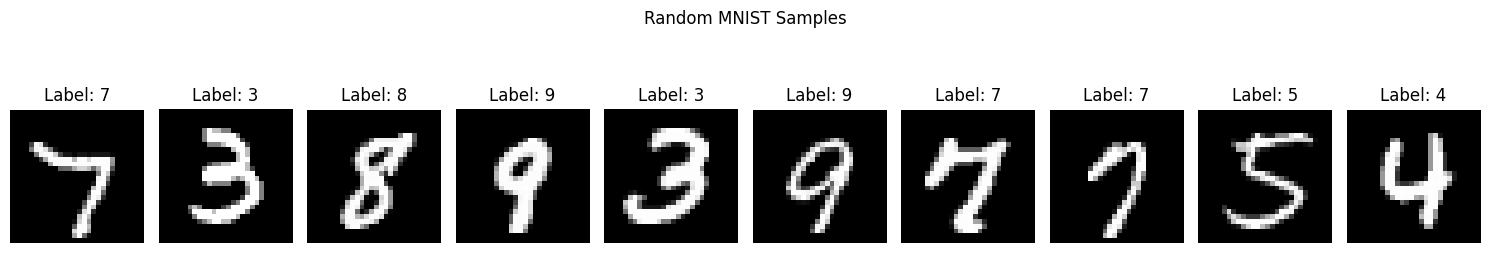

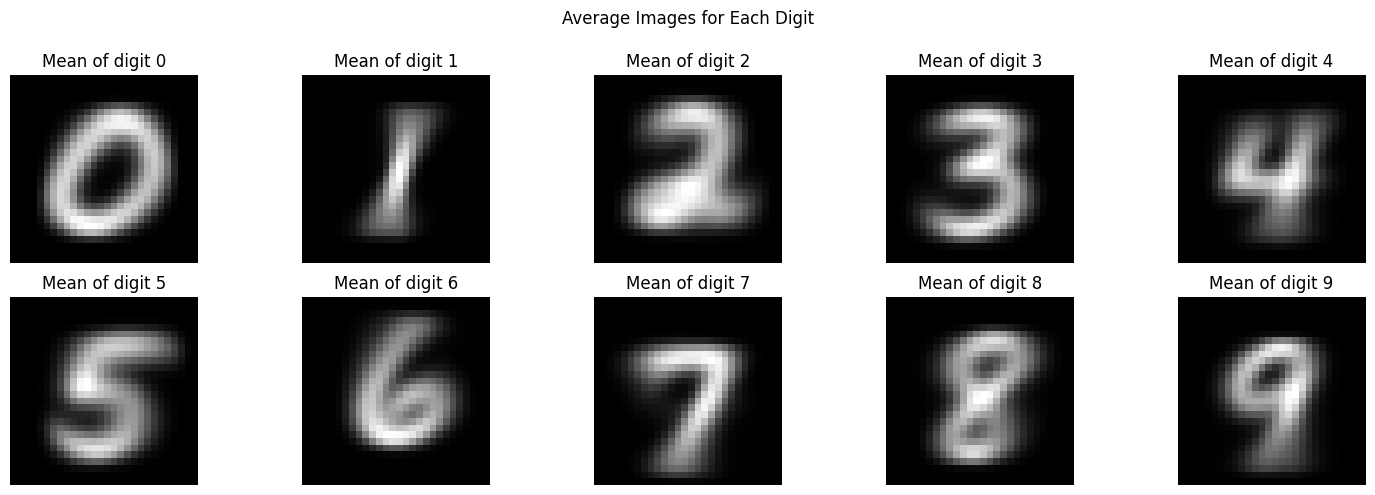

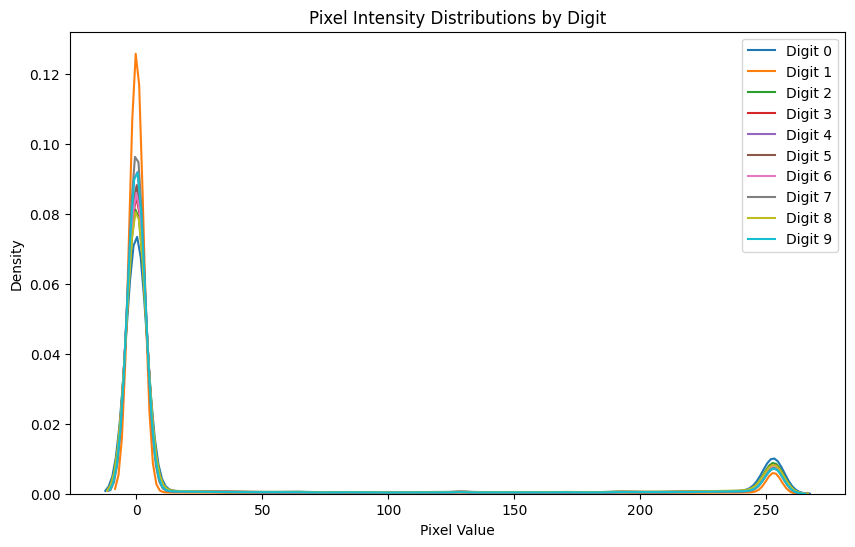

In [6]:
# DATA VISUALIZATION
print("\n--- DATA VISUALIZATION ---")

# Function to display random samples
def display_random_samples(x, y, num_samples=10):
    indices = np.random.choice(len(x), num_samples, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[idx], cmap='gray')
        plt.title(f"Label: {y[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Random MNIST Samples")
    plt.subplots_adjust(top=0.8)
    plt.show()

display_random_samples(x_train, y_train)

# Display mean images for each digit
plt.figure(figsize=(15, 5))
for digit in range(10):
    ax = plt.subplot(2, 5, digit + 1)

    # Extract all instances of the specific digit
    digit_instances = x_train[y_train == digit]

    # Calculate mean image
    mean_digit = np.mean(digit_instances, axis=0)

    plt.imshow(mean_digit, cmap='gray')
    plt.title(f"Mean of digit {digit}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Average Images for Each Digit")
plt.subplots_adjust(top=0.85)
plt.show()

# Analyze pixel intensity distributions
plt.figure(figsize=(10, 6))
for digit in range(10):
    # Extract all instances of this digit
    digit_pixels = x_train[y_train == digit].flatten()

    # Plot distribution of pixel values
    sns.kdeplot(digit_pixels, label=f"Digit {digit}")

plt.title("Pixel Intensity Distributions by Digit")
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.show()


--- DIMENSIONALITY REDUCTION ---
Performing PCA...


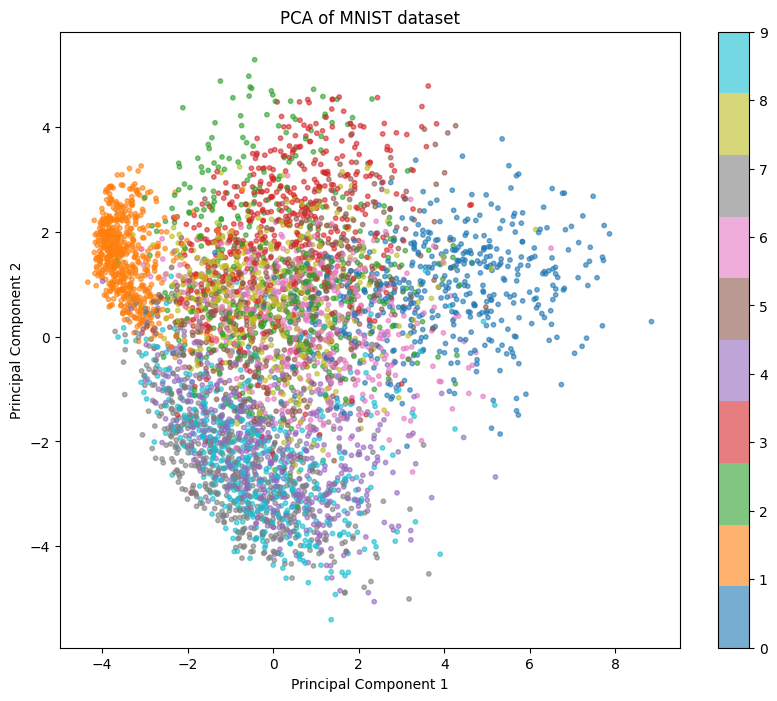

Explained variance by 2 PCA components: 16.91%


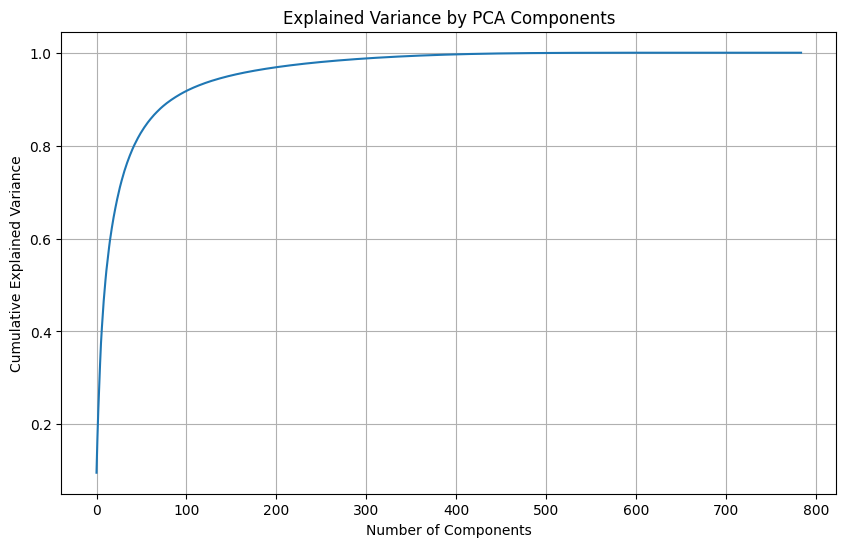

Performing t-SNE analysis (this may take a while)...
t-SNE completed in 56.76 seconds


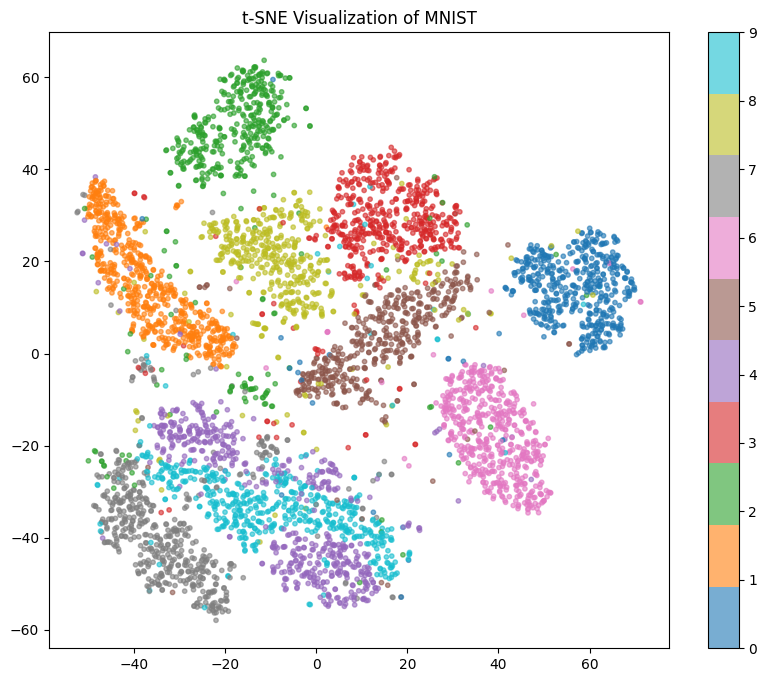

In [7]:
# DIMENSIONALITY REDUCTION
print("\n--- DIMENSIONALITY REDUCTION ---")

# Sample subset for dimensionality reduction (for speed)
sample_size = 5000
sample_indices = np.random.choice(len(x_train), sample_size, replace=False)
x_sample = x_train[sample_indices].reshape(sample_size, 28*28) / 255.0
y_sample = y_train[sample_indices]

# PCA Analysis
print("Performing PCA...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_sample, cmap='tab10',
                      alpha=0.6, s=10)
plt.colorbar(scatter)
plt.title('PCA of MNIST dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f"Explained variance by 2 PCA components: {sum(pca.explained_variance_ratio_):.2%}")

# Explained variance analysis
pca_full = PCA().fit(x_sample)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# t-SNE Analysis (takes longer)
print("Performing t-SNE analysis (this may take a while)...")
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_result = tsne.fit_transform(x_sample)
print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_sample, cmap='tab10',
                     alpha=0.6, s=10)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of MNIST')
plt.grid(False)
plt.show()


--- MODEL TRAINING AND EVALUATION ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Simple Neural Network...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7435 - loss: 0.8342 - val_accuracy: 0.9573 - val_loss: 0.1490
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9331 - loss: 0.2277 - val_accuracy: 0.9683 - val_loss: 0.1100
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.1684 - val_accuracy: 0.9710 - val_loss: 0.0967
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9580 - loss: 0.1385 - val_accuracy: 0.9755 - val_loss: 0.0768
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9648 - loss: 0.1153 - val_accuracy: 0.9782 - val_loss: 0.0716
Training CNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8194 - loss: 0.5878 - val_accuracy: 0.9818 - val_loss: 0.0593
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0864 - val_accuracy: 0.9868 - val_loss: 0.0443
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9888 - val_loss: 0.0385
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0365 - val_accuracy: 0.9890 - val_loss: 0.0378

Evaluating Simple Neural Network on test set:
Test accuracy: 0.9752

Evaluating CNN on test set:
Test accuracy: 0.9894


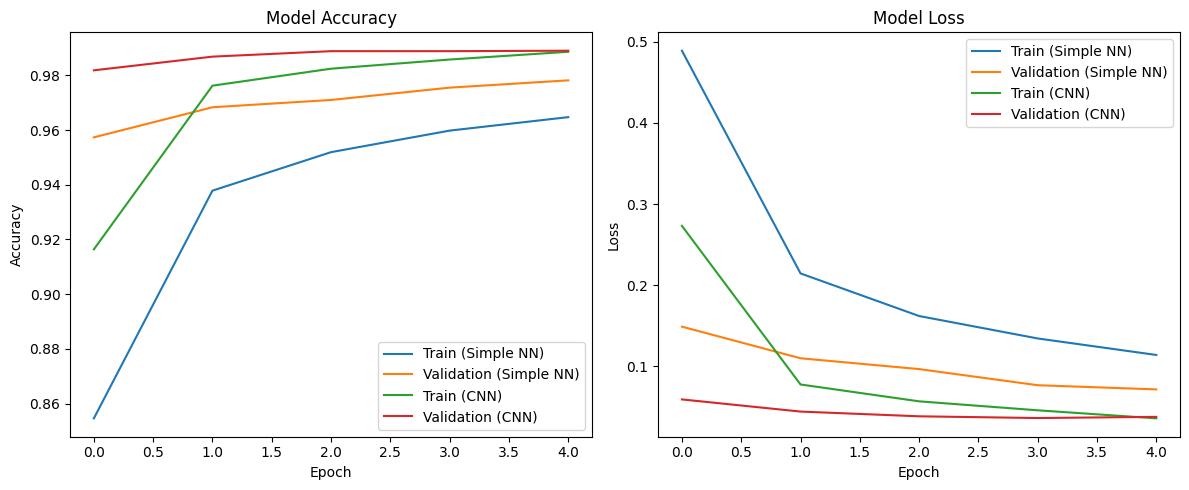

In [8]:
# MODEL TRAINING AND EVALUATION
print("\n--- MODEL TRAINING AND EVALUATION ---")

# Data preprocessing
# Normalize data
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255

# Reshape for different models
x_train_flat = x_train_normalized.reshape((-1, 28*28))
x_test_flat = x_test_normalized.reshape((-1, 28*28))

x_train_cnn = x_train_normalized.reshape((-1, 28, 28, 1))
x_test_cnn = x_test_normalized.reshape((-1, 28, 28, 1))

# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Simple Neural Network Model
def train_simple_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Training Simple Neural Network...")
    history = model.fit(x_train_flat, y_train_categorical,
                        batch_size=128, epochs=5, verbose=1,
                        validation_split=0.1)

    return model, history

# CNN Model
def train_cnn():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Training CNN...")
    history = model.fit(x_train_cnn, y_train_categorical,
                        batch_size=128, epochs=5, verbose=1,
                        validation_split=0.1)

    return model, history

# Train models
simple_model, simple_history = train_simple_nn()
cnn_model, cnn_history = train_cnn()

# Evaluate models
print("\nEvaluating Simple Neural Network on test set:")
simple_loss, simple_acc = simple_model.evaluate(x_test_flat, y_test_categorical, verbose=0)
print(f"Test accuracy: {simple_acc:.4f}")

print("\nEvaluating CNN on test set:")
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_categorical, verbose=0)
print(f"Test accuracy: {cnn_acc:.4f}")

# Plot training histories
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(simple_history.history['accuracy'], label='Train (Simple NN)')
plt.plot(simple_history.history['val_accuracy'], label='Validation (Simple NN)')
plt.plot(cnn_history.history['accuracy'], label='Train (CNN)')
plt.plot(cnn_history.history['val_accuracy'], label='Validation (CNN)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(simple_history.history['loss'], label='Train (Simple NN)')
plt.plot(simple_history.history['val_loss'], label='Validation (Simple NN)')
plt.plot(cnn_history.history['loss'], label='Train (CNN)')
plt.plot(cnn_history.history['val_loss'], label='Validation (CNN)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


--- ERROR ANALYSIS ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


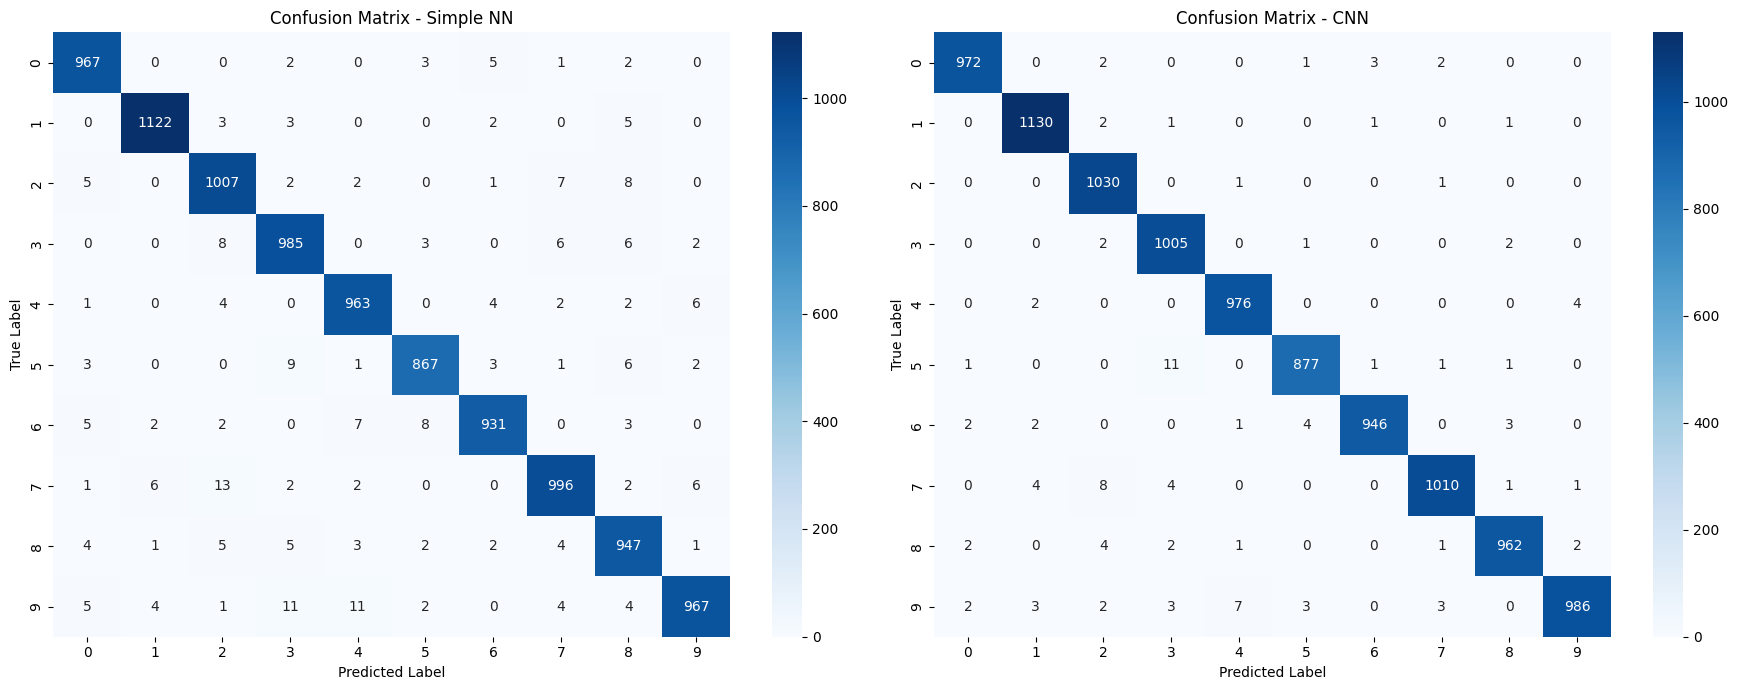

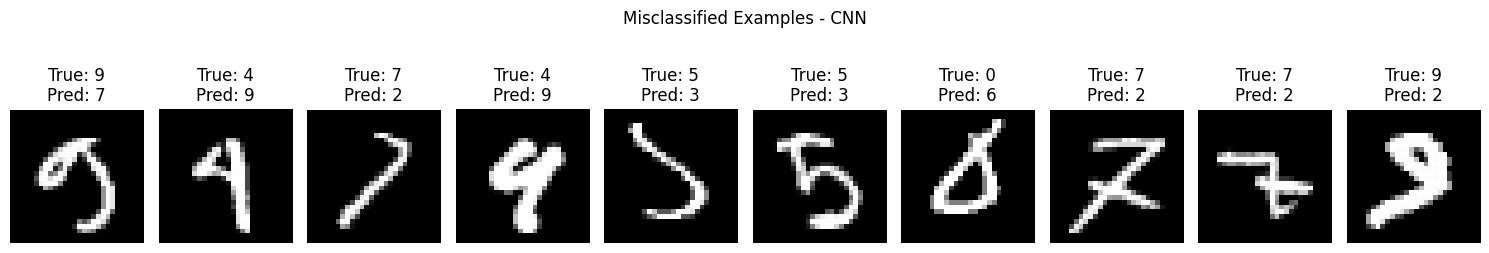


Classification Report - Simple NN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Classification Report - CNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2

In [9]:
# ERROR ANALYSIS
print("\n--- ERROR ANALYSIS ---")

# Generate predictions
y_pred_simple = np.argmax(simple_model.predict(x_test_flat), axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

# Confusion matrices
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
cm_simple = confusion_matrix(y_test, y_pred_simple)
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Simple NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Display misclassified examples for CNN
def display_misclassified(x, y_true, y_pred, model_name, num_examples=10):
    misclassified_indices = np.where(y_true != y_pred)[0]
    if len(misclassified_indices) > num_examples:
        selected_indices = np.random.choice(misclassified_indices, num_examples, replace=False)
    else:
        selected_indices = misclassified_indices

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_examples, i + 1)
        # If showing CNN misclassifications, need to reshape from (28, 28, 1) to (28, 28)
        if x.shape[-1] == 1:
            plt.imshow(x[idx].reshape(28, 28), cmap='gray')
        else:
            plt.imshow(x[idx], cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f"Misclassified Examples - {model_name}")
    plt.subplots_adjust(top=0.8)
    plt.show()

display_misclassified(x_test, y_test, y_pred_cnn, "CNN")

# Classification reports
print("\nClassification Report - Simple NN:")
print(classification_report(y_test, y_pred_simple))

print("\nClassification Report - CNN:")
print(classification_report(y_test, y_pred_cnn))


--- FEATURE IMPORTANCE ANALYSIS ---


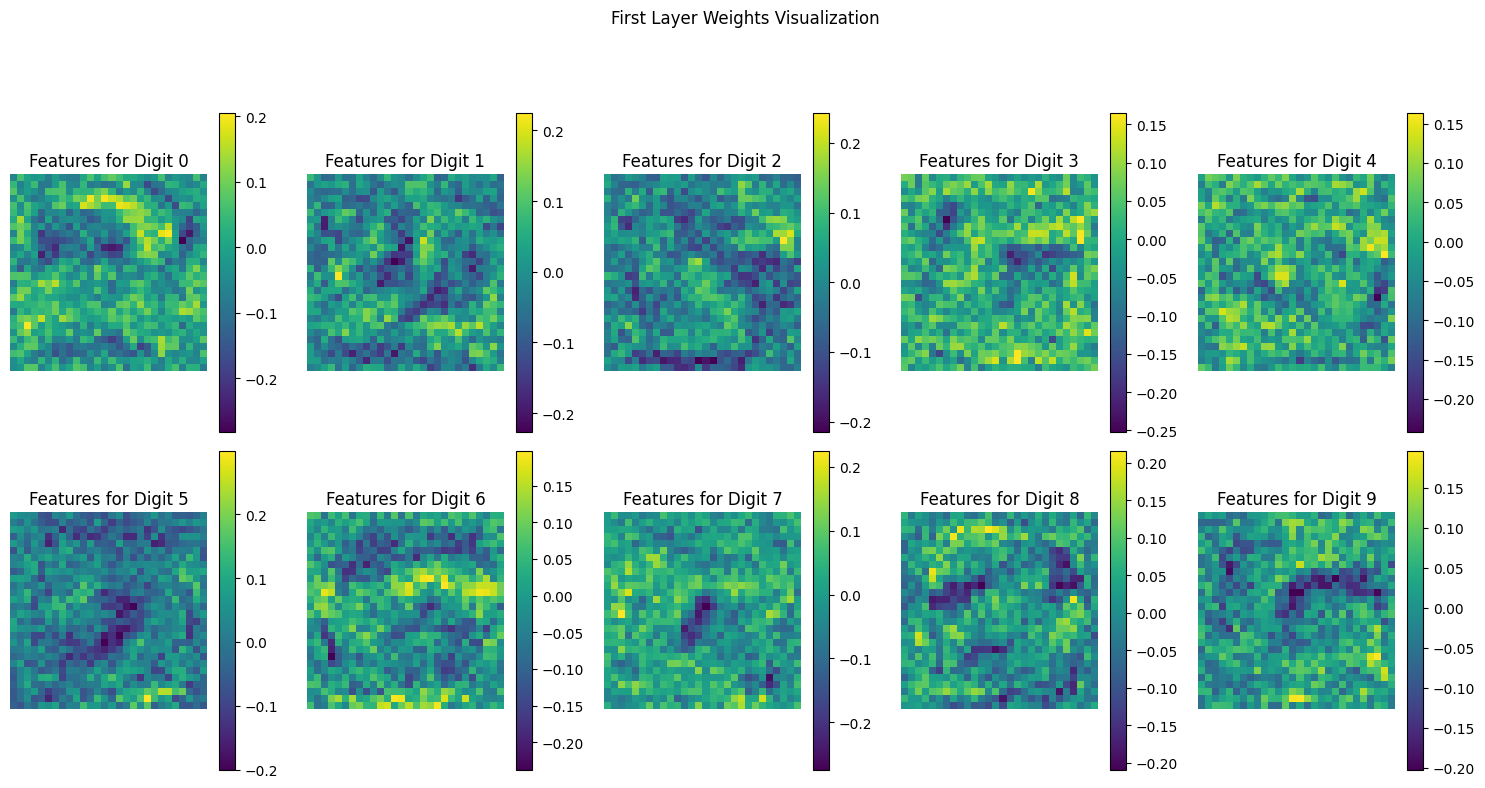

In [10]:
# FEATURE IMPORTANCE ANALYSIS
print("\n--- FEATURE IMPORTANCE ANALYSIS ---")

# Visualize weights from the first layer of the simple neural network
weights = simple_model.layers[0].get_weights()[0]
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape weights for digit i to 28x28 for visualization
    weight_img = weights.T[i].reshape(28, 28)
    plt.imshow(weight_img, cmap='viridis')
    plt.title(f'Features for Digit {i}')
    plt.colorbar()
    plt.axis('off')

plt.tight_layout()
plt.suptitle("First Layer Weights Visualization")
plt.subplots_adjust(top=0.85)
plt.show()

In [11]:
# SUMMARY AND CONCLUSIONS
print("\n--- SUMMARY AND CONCLUSIONS ---")
print(f"Dataset size: {len(x_train)} training samples, {len(x_test)} test samples")
print(f"Simple Neural Network accuracy: {simple_acc:.4f}")
print(f"CNN accuracy: {cnn_acc:.4f}")
print("\nMost confused digits:")
# Get the top 3 most confused pairs
confusion = cm_cnn - np.diag(np.diag(cm_cnn))
top_confused = np.dstack(np.unravel_index(np.argsort(confusion.ravel())[-3:], confusion.shape))[0]
for true_label, pred_label in reversed(top_confused):
    print(f"True digit {true_label} misclassified as {pred_label}: {confusion[true_label, pred_label]} times")

print("\nAnalysis Complete!")


--- SUMMARY AND CONCLUSIONS ---
Dataset size: 60000 training samples, 10000 test samples
Simple Neural Network accuracy: 0.9752
CNN accuracy: 0.9894

Most confused digits:
True digit 5 misclassified as 3: 11 times
True digit 7 misclassified as 2: 8 times
True digit 9 misclassified as 4: 7 times

Analysis Complete!


# **Advanced MNIST Dataset Analysis**

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import NMF
import cv2
from scipy.stats import entropy
from scipy.spatial.distance import cdist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, UpSampling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import umap

In [13]:
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Reshape for different analyses
x_train_flat = x_train_norm.reshape(-1, 28*28)
x_test_flat = x_test_norm.reshape(-1, 28*28)

x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

Loading MNIST dataset...



--- STYLE AND STRUCTURE ANALYSIS ---


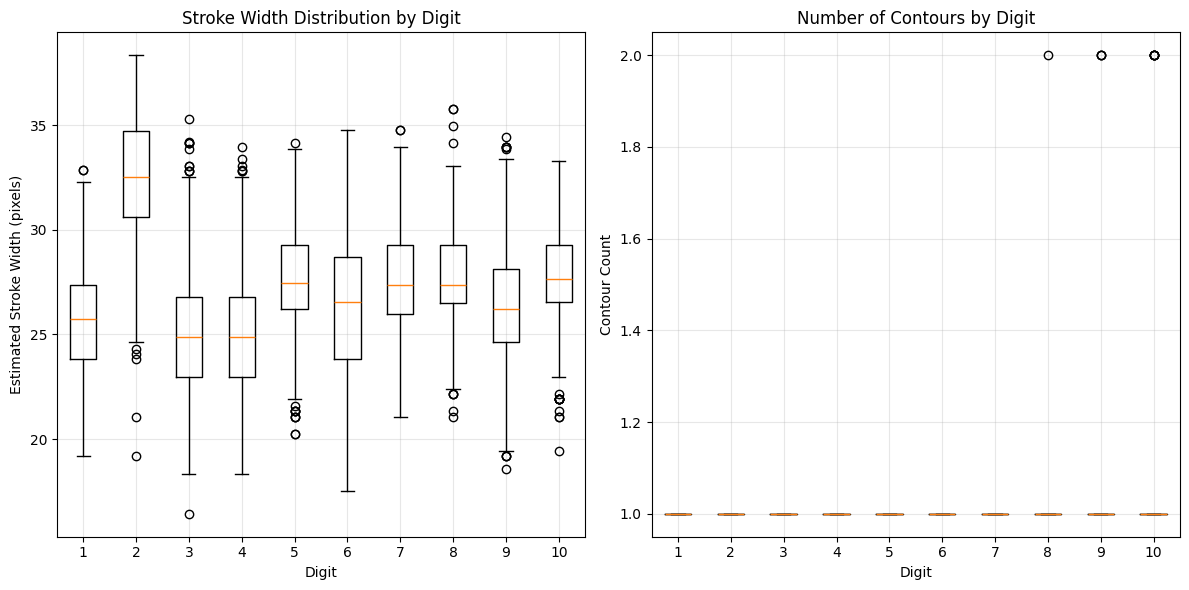

In [14]:
# STYLE AND STRUCTURE ANALYSIS
print("\n--- STYLE AND STRUCTURE ANALYSIS ---")

# Compute stroke width transform to analyze digit stroke properties
def compute_stroke_properties(images):
    stroke_widths = []
    contour_counts = []

    # Process subset of images for speed
    sample_size = min(1000, len(images))
    indices = np.random.choice(len(images), sample_size, replace=False)

    for idx in indices:
        img = images[idx].copy()

        # Convert to binary image with proper scaling
        img = (img * 255).astype(np.uint8)
        _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour_counts.append(len(contours))

        # Distance transform approximates half the stroke width
        dist = cv2.distanceTransform(binary, cv2.DIST_L2, 3)
        # Get maximum distance as approximate stroke width
        if np.max(dist) > 0:
            stroke_widths.append(np.max(dist) * 2)  # Multiply by 2 to get full width
        else:
            stroke_widths.append(0)

    return np.array(stroke_widths), np.array(contour_counts)

# Compute stroke properties per digit class
digit_stroke_widths = []
digit_contour_counts = []

for digit in range(10):
    digit_images = x_train_norm[y_train == digit]
    stroke_widths, contour_counts = compute_stroke_properties(digit_images)
    digit_stroke_widths.append(stroke_widths)
    digit_contour_counts.append(contour_counts)

# Plot stroke width distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(digit_stroke_widths)
plt.title('Stroke Width Distribution by Digit')
plt.xlabel('Digit')
plt.ylabel('Estimated Stroke Width (pixels)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(digit_contour_counts)
plt.title('Number of Contours by Digit')
plt.xlabel('Digit')
plt.ylabel('Contour Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- ADVANCED DIMENSIONALITY REDUCTION WITH UMAP ---
Performing UMAP dimensionality reduction...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


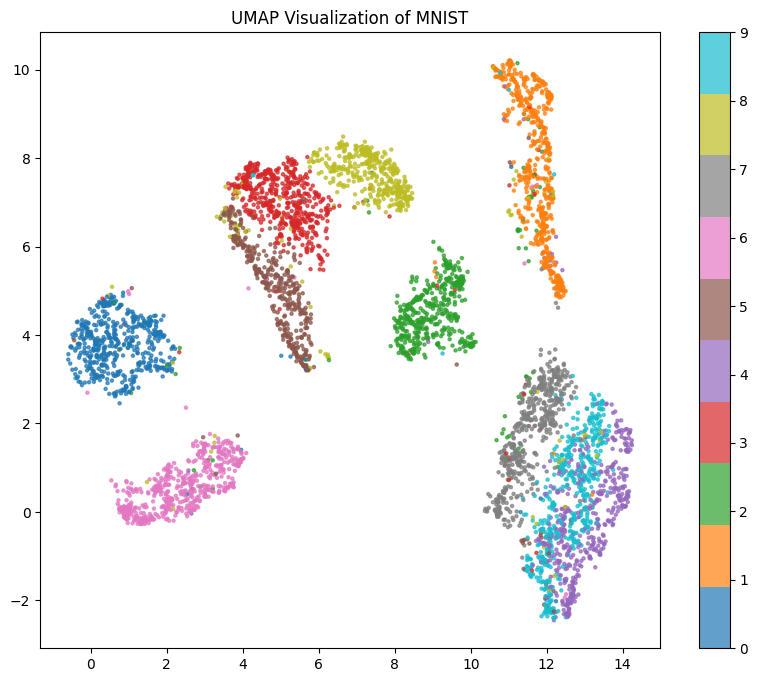

In [15]:
# ADVANCED DIMENSIONALITY REDUCTION WITH UMAP
print("\n--- ADVANCED DIMENSIONALITY REDUCTION WITH UMAP ---")

# Sample subset for dimensionality reduction
sample_size = 5000
sample_indices = np.random.choice(len(x_train), sample_size, replace=False)
x_sample = x_train_flat[sample_indices]
y_sample = y_train[sample_indices]

# UMAP - Uniform Manifold Approximation and Projection
print("Performing UMAP dimensionality reduction...")
reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_result = reducer.fit_transform(x_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=y_sample,
                     cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter)
plt.title('UMAP Visualization of MNIST')
plt.grid(False)
plt.show()


--- NON-NEGATIVE MATRIX FACTORIZATION ---


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


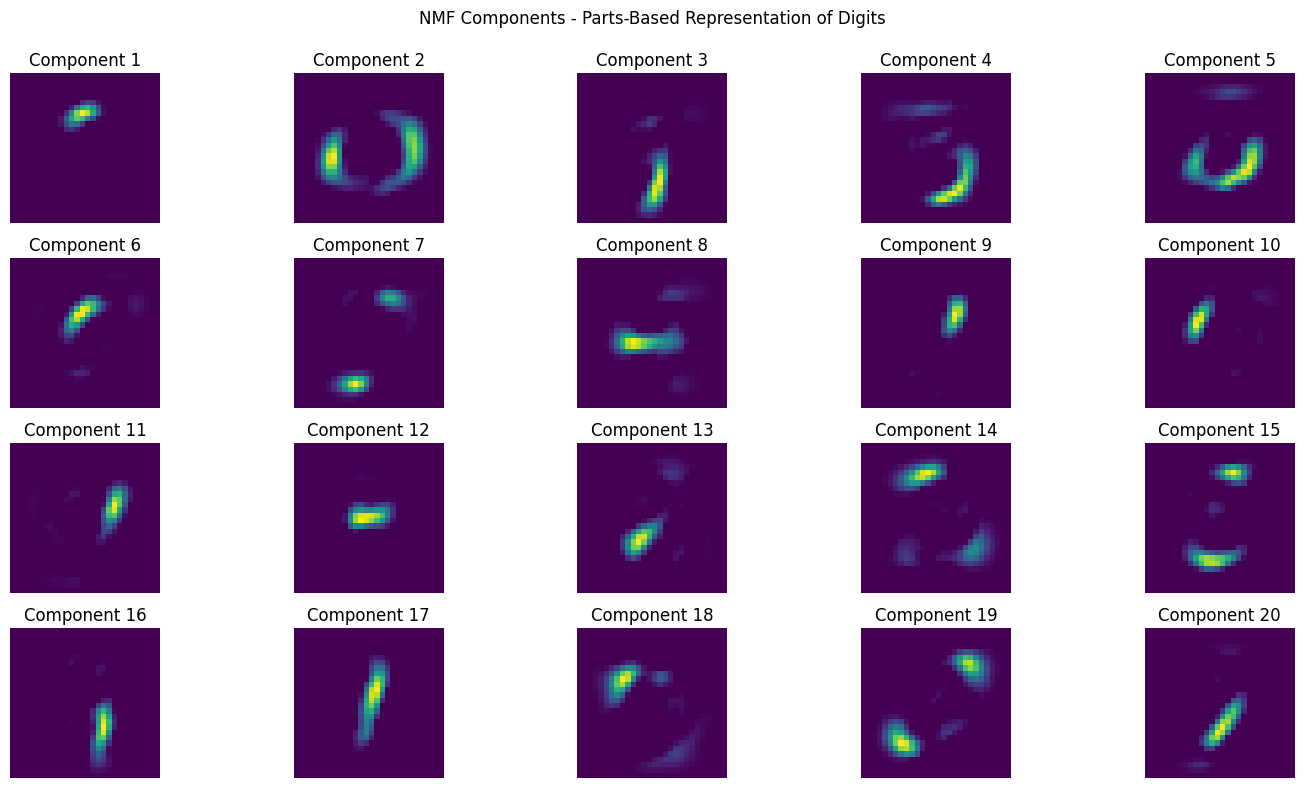

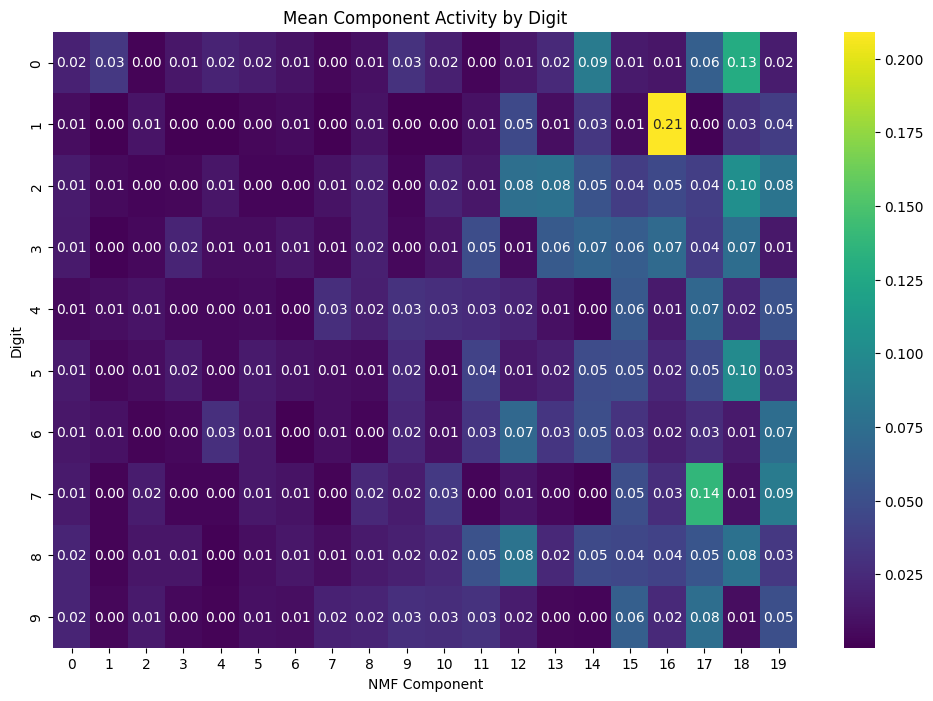

In [16]:
# NON-NEGATIVE MATRIX FACTORIZATION FOR FEATURE EXTRACTION
print("\n--- NON-NEGATIVE MATRIX FACTORIZATION ---")

# NMF can help discover parts-based representations of digits
nmf = NMF(n_components=20, random_state=42)
nmf_features = nmf.fit_transform(x_train_flat)
components = nmf.components_

# Visualize the components (basis digits)
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(components[i].reshape(28, 28), cmap='viridis')
    plt.title(f'Component {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle('NMF Components - Parts-Based Representation of Digits')
plt.subplots_adjust(top=0.9)
plt.show()

# Analyze which components are most active for each digit
digit_component_activity = []
for digit in range(10):
    # Get samples for this digit
    digit_samples = nmf_features[y_train == digit]
    # Calculate mean activation for each component
    mean_activity = np.mean(digit_samples, axis=0)
    digit_component_activity.append(mean_activity)

# Convert to array for easier plotting
digit_component_activity = np.array(digit_component_activity)

# Plot component activity by digit
plt.figure(figsize=(12, 8))
sns.heatmap(digit_component_activity, annot=True, fmt='.2f', cmap='viridis')
plt.xlabel('NMF Component')
plt.ylabel('Digit')
plt.title('Mean Component Activity by Digit')
plt.show()


--- ADVERSARIAL EXAMPLES ANALYSIS ---
Training a CNN model for adversarial example generation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8244 - loss: 0.5926 - val_accuracy: 0.9832 - val_loss: 0.0556
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9751 - loss: 0.0850 - val_accuracy: 0.9883 - val_loss: 0.0410
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9908 - val_loss: 0.0312
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9880 - loss: 0.0368 - val_accuracy: 0.9912 - val_loss: 0.0305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━

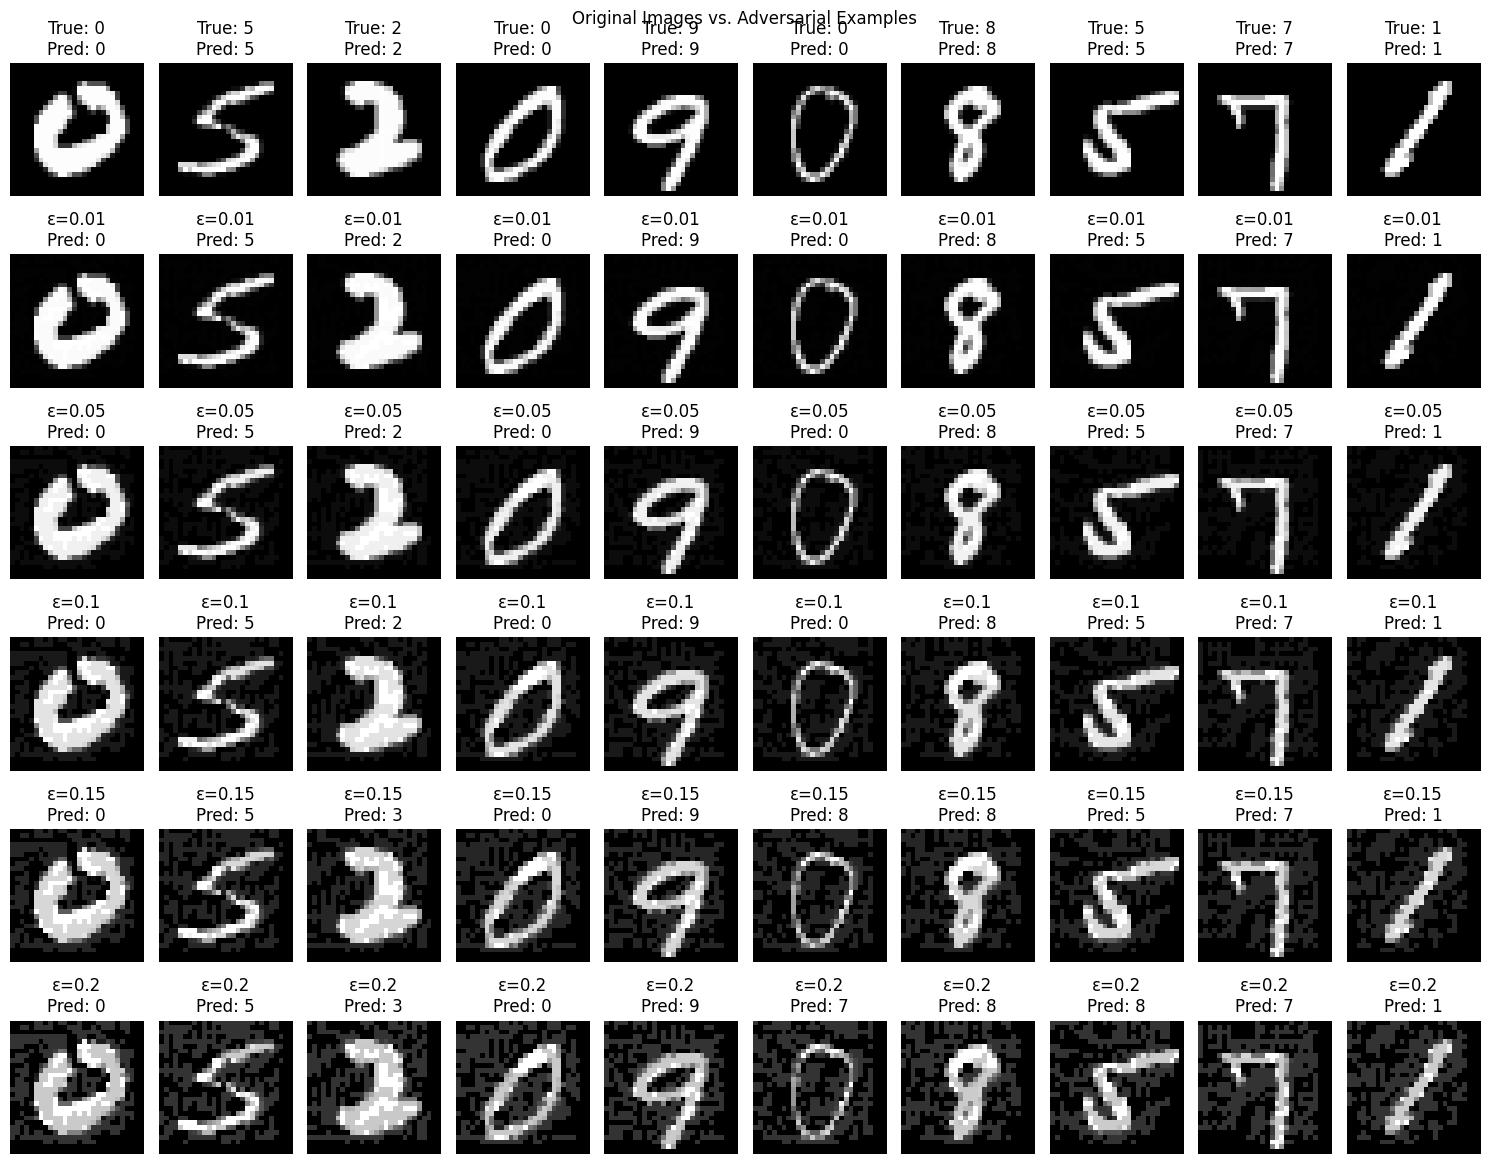

In [17]:
# ADVERSARIAL EXAMPLES GENERATION AND ANALYSIS
print("\n--- ADVERSARIAL EXAMPLES ANALYSIS ---")

# We'll need a model first - let's use a simple CNN
def create_simple_cnn():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load a pre-trained model or train one with early stopping
print("Training a CNN model for adversarial example generation...")
cnn_model = create_simple_cnn()
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
cnn_model.fit(x_train_cnn, y_train_categorical,
              batch_size=128, epochs=5, verbose=1,
              validation_split=0.1,
              callbacks=[early_stop])

# Function to generate FGSM adversarial examples
def generate_adversarial_examples(model, x, y, epsilon=0.1):
    # Create a tensor for the input image
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)

    with tf.GradientTape() as tape:
        # Watch the input tensor
        tape.watch(x_tensor)
        # Get prediction
        prediction = model(x_tensor)
        # Calculate loss
        loss = tf.keras.losses.categorical_crossentropy(y, prediction)

    # Get the gradients
    gradient = tape.gradient(loss, x_tensor)

    # Create adversarial example
    signed_grad = tf.sign(gradient)
    adversarial_x = x_tensor + epsilon * signed_grad

    # Ensure values stay in valid range [0, 1]
    adversarial_x = tf.clip_by_value(adversarial_x, 0, 1)

    return adversarial_x.numpy()

# Generate adversarial examples for a subset of test images
num_examples = 10
subset_indices = np.random.choice(len(x_test_cnn), num_examples, replace=False)
x_test_subset = x_test_cnn[subset_indices]
y_test_subset = y_test_categorical[subset_indices]

# Generate adversarial examples with different epsilon values
epsilons = [0.01, 0.05, 0.1, 0.15, 0.2]
all_adversarial_examples = []

for epsilon in epsilons:
    adversarial_examples = generate_adversarial_examples(cnn_model, x_test_subset, y_test_subset, epsilon)
    all_adversarial_examples.append(adversarial_examples)

# Compare original predictions with adversarial predictions
plt.figure(figsize=(15, len(epsilons)*2 + 2))

# Plot original images in the first row
for i in range(num_examples):
    plt.subplot(len(epsilons) + 1, num_examples, i + 1)
    plt.imshow(x_test_subset[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    orig_pred = np.argmax(cnn_model.predict(x_test_subset[i:i+1]), axis=1)[0]
    true_label = np.argmax(y_test_subset[i])
    plt.title(f"True: {true_label}\nPred: {orig_pred}")

# Plot adversarial examples in subsequent rows
for row, (epsilon, adversarial_examples) in enumerate(zip(epsilons, all_adversarial_examples)):
    for col, adversarial_example in enumerate(adversarial_examples):
        plt.subplot(len(epsilons) + 1, num_examples, (row + 1) * num_examples + col + 1)
        plt.imshow(adversarial_example.reshape(28, 28), cmap='gray')
        plt.axis('off')
        adv_pred = np.argmax(cnn_model.predict(adversarial_example.reshape(1, 28, 28, 1)), axis=1)[0]
        true_label = np.argmax(y_test_subset[col])
        plt.title(f"ε={epsilon}\nPred: {adv_pred}")

plt.tight_layout()
plt.suptitle("Original Images vs. Adversarial Examples")
plt.subplots_adjust(top=0.95)
plt.show()


--- AUTOENCODER ANALYSIS ---
Training autoencoder for anomaly detection...
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2697 - val_loss: 0.0914
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0897 - val_loss: 0.0831
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0830 - val_loss: 0.0796
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


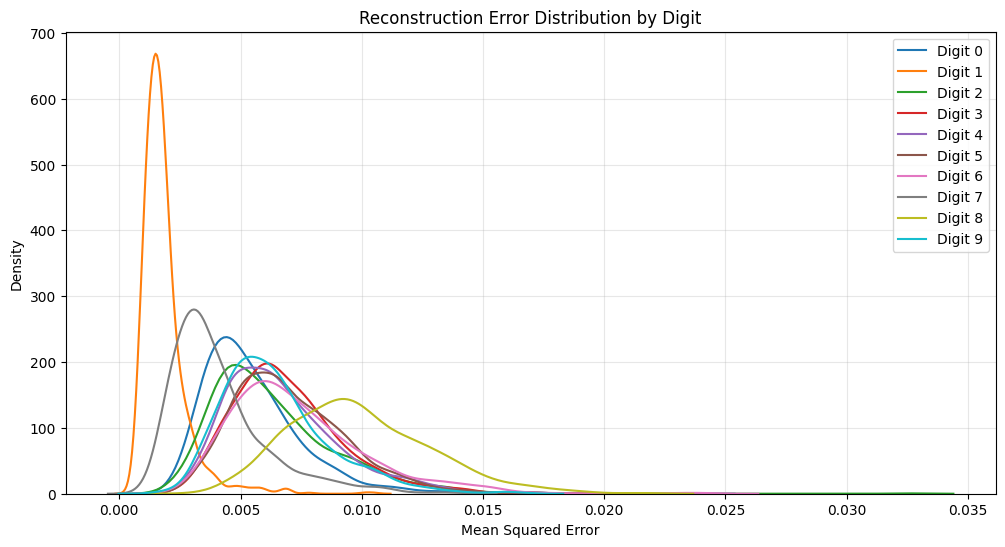

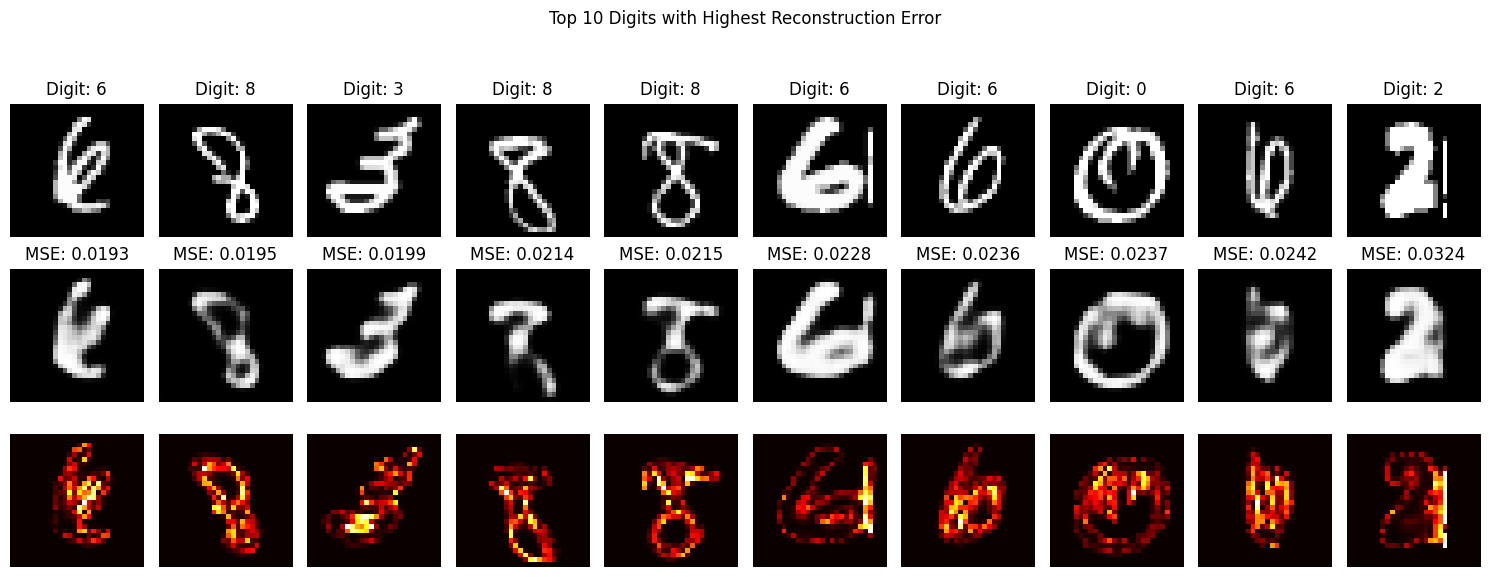

In [18]:
# AUTOENCODER FOR ANOMALY DETECTION
print("\n--- AUTOENCODER ANALYSIS ---")

# Build an autoencoder model
def build_autoencoder():
    # Encoder
    input_img = Input(shape=(28, 28, 1))
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    # At this point, representation is (7, 7, 8)

    # Decoder
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

print("Training autoencoder for anomaly detection...")
autoencoder = build_autoencoder()
autoencoder.fit(x_train_cnn, x_train_cnn,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_cnn, x_test_cnn),
                verbose=1)

# Predict on test set and calculate reconstruction error
predicted = autoencoder.predict(x_test_cnn)
mse = np.mean(np.square(x_test_cnn - predicted), axis=(1, 2, 3))

# Analyze reconstruction error by digit
plt.figure(figsize=(12, 6))
for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    digit_mse = mse[digit_indices]
    sns.kdeplot(digit_mse, label=f'Digit {digit}')

plt.title('Reconstruction Error Distribution by Digit')
plt.xlabel('Mean Squared Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show original, reconstructed and difference for digits with high reconstruction errors
# Get the indices of the worst reconstructions
worst_indices = np.argsort(mse)[-10:]

plt.figure(figsize=(15, 6))
for i, idx in enumerate(worst_indices):
    # Original
    plt.subplot(3, 10, i + 1)
    plt.imshow(x_test_cnn[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {y_test[idx]}")
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, 10, i + 11)
    plt.imshow(predicted[idx].reshape(28, 28), cmap='gray')
    plt.title(f"MSE: {mse[idx]:.4f}")
    plt.axis('off')

    # Difference
    plt.subplot(3, 10, i + 21)
    plt.imshow(np.abs(x_test_cnn[idx] - predicted[idx]).reshape(28, 28), cmap='hot')
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Top 10 Digits with Highest Reconstruction Error")
plt.subplots_adjust(top=0.85)
plt.show()


--- DATA AUGMENTATION IMPACT ANALYSIS ---


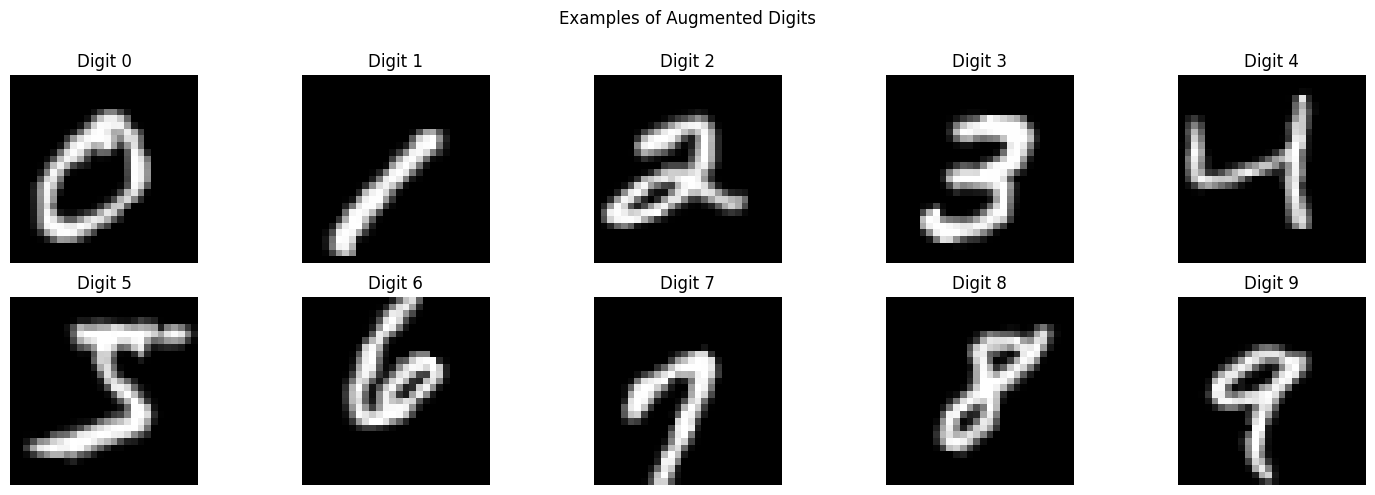

In [19]:
# DATA AUGMENTATION IMPACT ANALYSIS
print("\n--- DATA AUGMENTATION IMPACT ANALYSIS ---")

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

# Compare a model trained with augmented data to one without
def train_with_augmentation(use_augmentation=False):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    if use_augmentation:
        # Train with augmentation
        datagen.fit(x_train_cnn)
        history = model.fit(datagen.flow(x_train_cnn, y_train_categorical, batch_size=128),
                            steps_per_epoch=len(x_train_cnn) // 128,
                            epochs=5,
                            validation_data=(x_test_cnn, y_test_categorical),
                            verbose=1)
    else:
        # Train without augmentation
        history = model.fit(x_train_cnn, y_train_categorical,
                            batch_size=128,
                            epochs=5,
                            validation_data=(x_test_cnn, y_test_categorical),
                            verbose=1)

    return model, history

# To save time, just display some augmentation examples
plt.figure(figsize=(15, 5))
for i in range(10):
    # Get a sample image
    img = x_train_cnn[y_train == i][0:1]

    # Generate an augmented version
    for x_batch in datagen.flow(img, batch_size=1):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_batch[0].reshape(28, 28), cmap='gray')
        plt.title(f"Digit {i}")
        plt.axis('off')
        break  # only get one augmentation

plt.tight_layout()
plt.suptitle("Examples of Augmented Digits")
plt.subplots_adjust(top=0.85)
plt.show()


--- DIVERSITY AND COMPLEXITY ANALYSIS ---


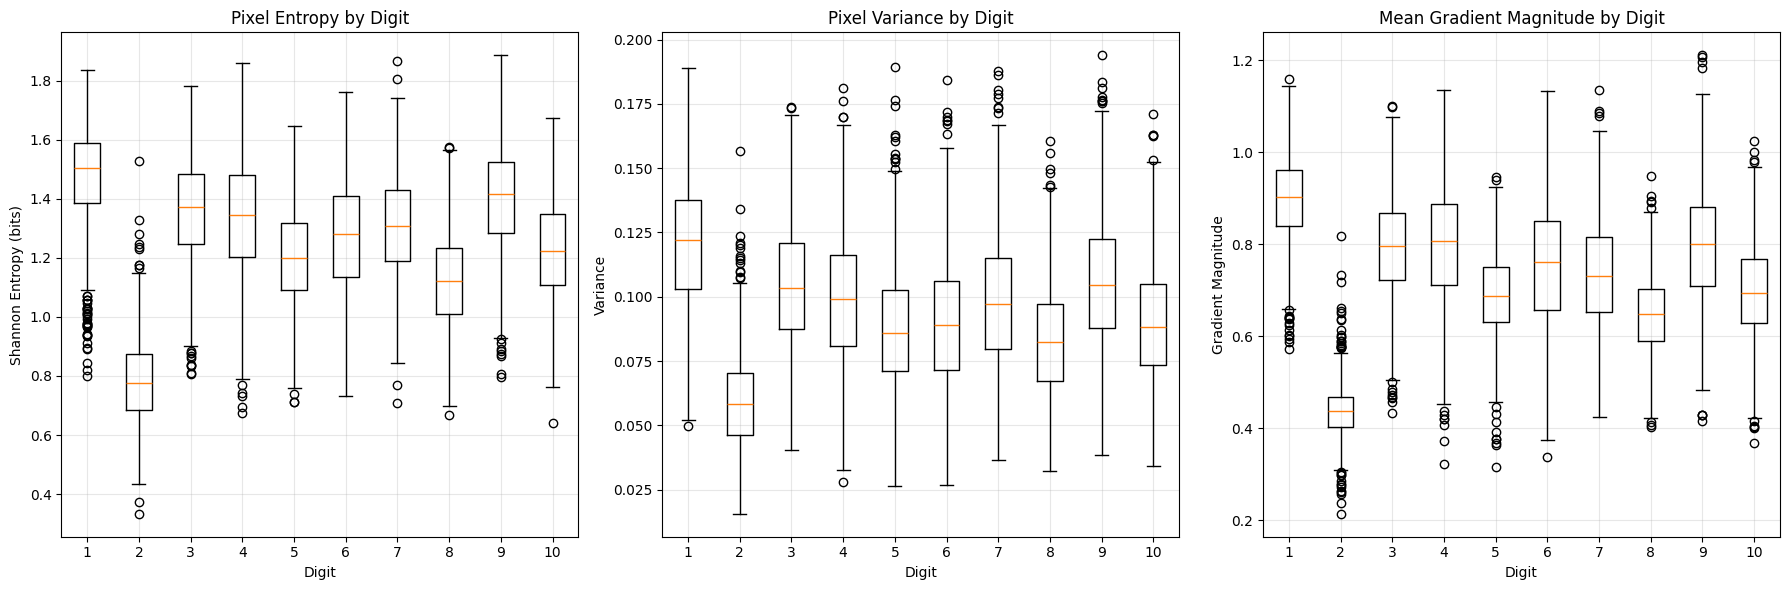

In [20]:
# DIVERSITY AND COMPLEXITY ANALYSIS
print("\n--- DIVERSITY AND COMPLEXITY ANALYSIS ---")

# Analyze digit complexity using methods like entropy and pixel variance
def compute_complexity_metrics(images):
    # Sample subset for speed
    sample_size = min(1000, len(images))
    indices = np.random.choice(len(images), sample_size, replace=False)
    sample_images = images[indices]

    metrics = {
        'pixel_entropy': [],
        'pixel_variance': [],
        'gradient_magnitude': []
    }

    for img in sample_images:
        # Flatten image for entropy calculation
        flat_img = img.flatten()

        # Calculate histogram for entropy
        hist, _ = np.histogram(flat_img, bins=20, range=(0, 1))
        hist = hist / hist.sum()  # Normalize to get probabilities

        # Calculate Shannon entropy
        entropy_val = entropy(hist, base=2)
        metrics['pixel_entropy'].append(entropy_val)

        # Calculate per-image variance
        variance = np.var(flat_img)
        metrics['pixel_variance'].append(variance)

        # Calculate gradient magnitude (approximate complexity)
        dx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
        dy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
        gradient_mag = np.sqrt(dx**2 + dy**2)
        metrics['gradient_magnitude'].append(np.mean(gradient_mag))

    # Convert to numpy arrays
    for key in metrics:
        metrics[key] = np.array(metrics[key])

    return metrics

# Compute complexity metrics for each digit
digit_complexity = {}
for digit in range(10):
    digit_images = x_train_norm[y_train == digit]
    digit_complexity[digit] = compute_complexity_metrics(digit_images)

# Prepare data for plotting
entropy_by_digit = [digit_complexity[d]['pixel_entropy'] for d in range(10)]
variance_by_digit = [digit_complexity[d]['pixel_variance'] for d in range(10)]
gradient_by_digit = [digit_complexity[d]['gradient_magnitude'] for d in range(10)]

# Plot complexity metrics
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.boxplot(entropy_by_digit)
plt.title('Pixel Entropy by Digit')
plt.xlabel('Digit')
plt.ylabel('Shannon Entropy (bits)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(variance_by_digit)
plt.title('Pixel Variance by Digit')
plt.xlabel('Digit')
plt.ylabel('Variance')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.boxplot(gradient_by_digit)
plt.title('Mean Gradient Magnitude by Digit')
plt.xlabel('Digit')
plt.ylabel('Gradient Magnitude')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- CENTROID AND DISTANCE ANALYSIS ---


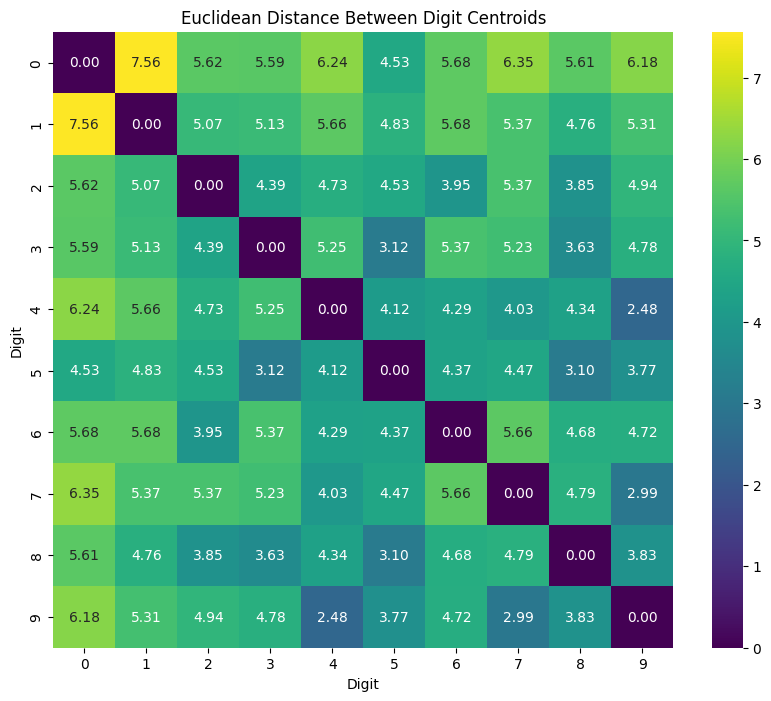

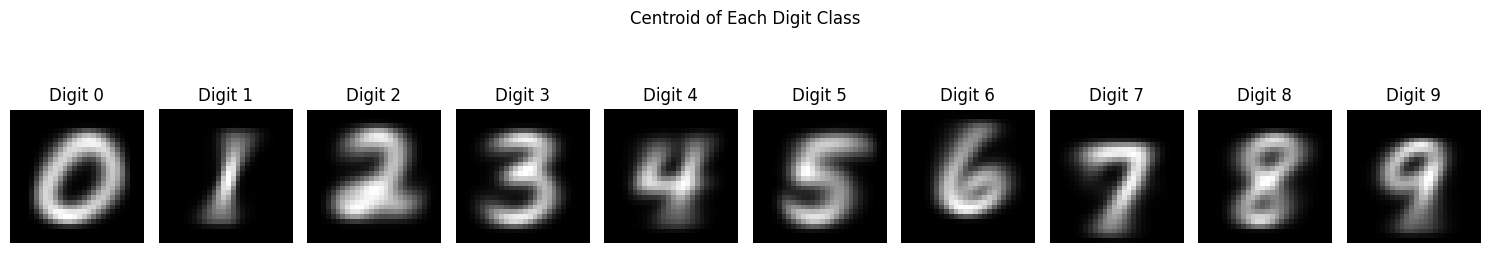

In [21]:
# CENTROID AND INTER-CLASS DISTANCE ANALYSIS
print("\n--- CENTROID AND DISTANCE ANALYSIS ---")

# Calculate centroids for each digit
centroids = []
for digit in range(10):
    digit_samples = x_train_flat[y_train == digit]
    centroid = np.mean(digit_samples, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# Calculate distances between centroids
distance_matrix = cdist(centroids, centroids, metric='euclidean')

# Visualize centroid distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Euclidean Distance Between Digit Centroids')
plt.xlabel('Digit')
plt.ylabel('Digit')
plt.show()

# Plot the centroids as digit images
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Centroid of Each Digit Class")
plt.subplots_adjust(top=0.8)
plt.show()


--- ROC AND PRECISION-RECALL ANALYSIS ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


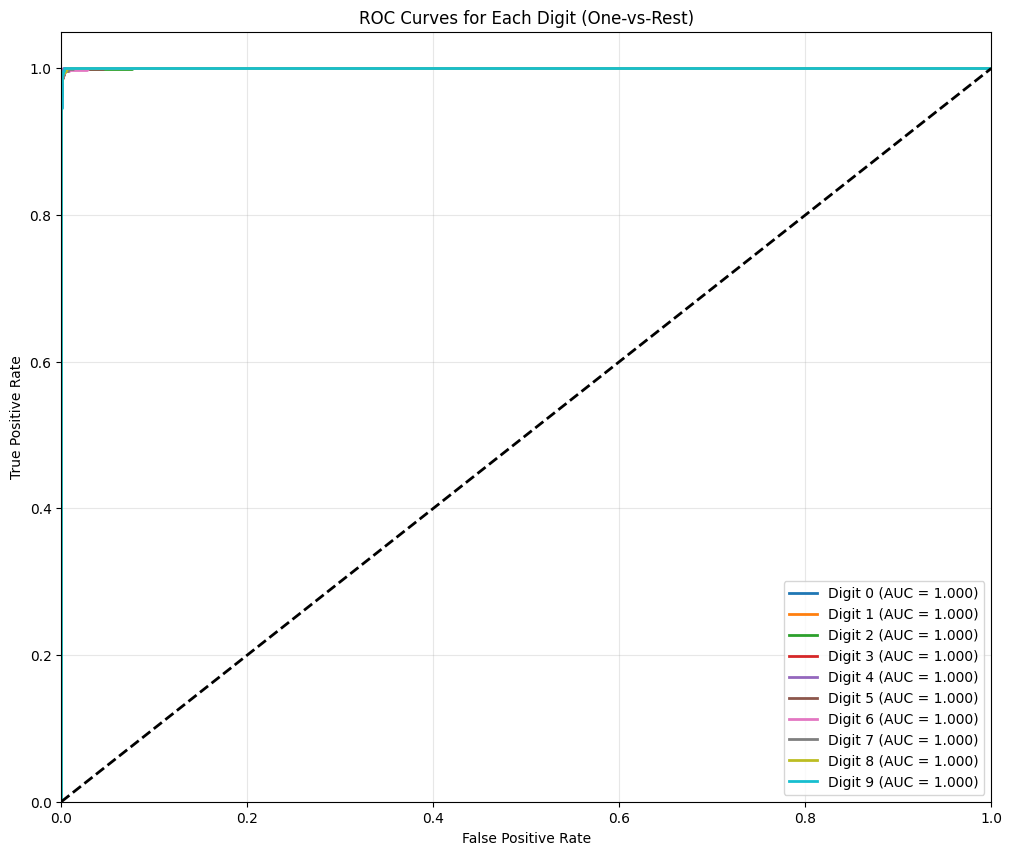

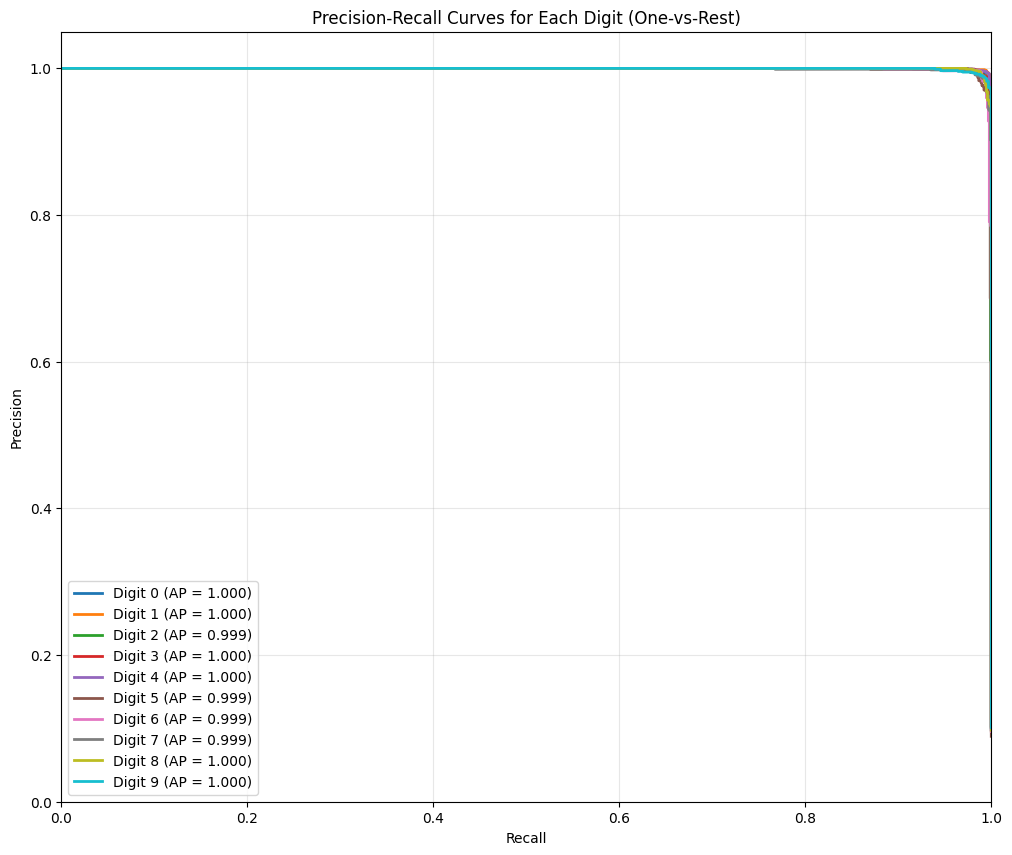

In [22]:
# ROC CURVE AND PRECISION-RECALL ANALYSIS
print("\n--- ROC AND PRECISION-RECALL ANALYSIS ---")

# We'll use the model from earlier to get predictions
y_pred_proba = cnn_model.predict(x_test_cnn)

# Calculate ROC curves for each digit (one-vs-rest)
plt.figure(figsize=(12, 10))
for i in range(10):
    # Convert to binary classification problem
    y_true_binary = (y_test == i).astype(int)
    y_score = y_pred_proba[:, i]

    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = roc_auc_score(y_true_binary, y_score)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Digit {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Digit (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and plot precision-recall curves
plt.figure(figsize=(12, 10))
for i in range(10):
    # Convert to binary classification problem
    y_true_binary = (y_test == i).astype(int)
    y_score = y_pred_proba[:, i]

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true_binary, y_score)
    avg_precision = average_precision_score(y_true_binary, y_score)

    # Plot precision-recall curve
    plt.plot(recall, precision, lw=2, label=f'Digit {i} (AP = {avg_precision:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Digit (One-vs-Rest)')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()


--- UNSUPERVISED CLUSTERING ANALYSIS ---
Performing KMeans clustering...


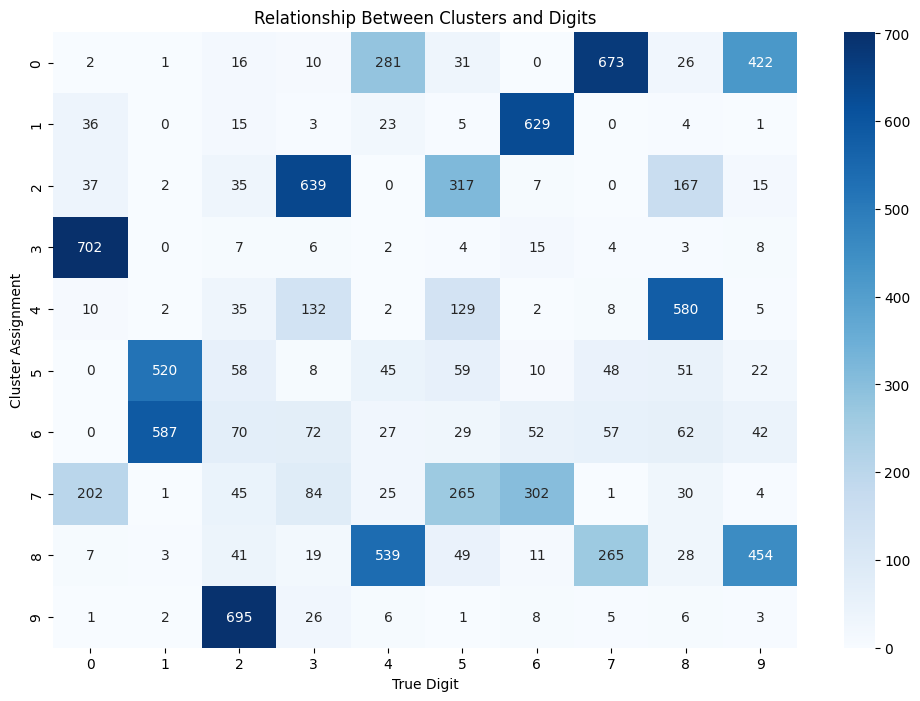

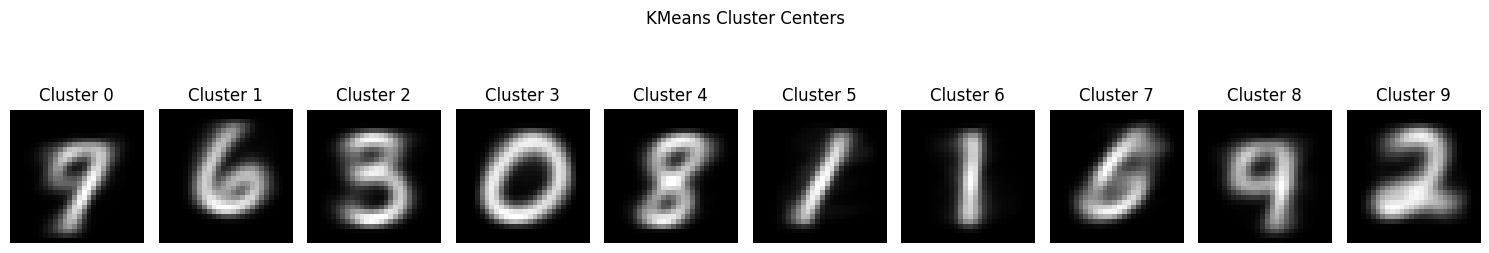


--- FEATURE IMPORTANCE ANALYSIS ---


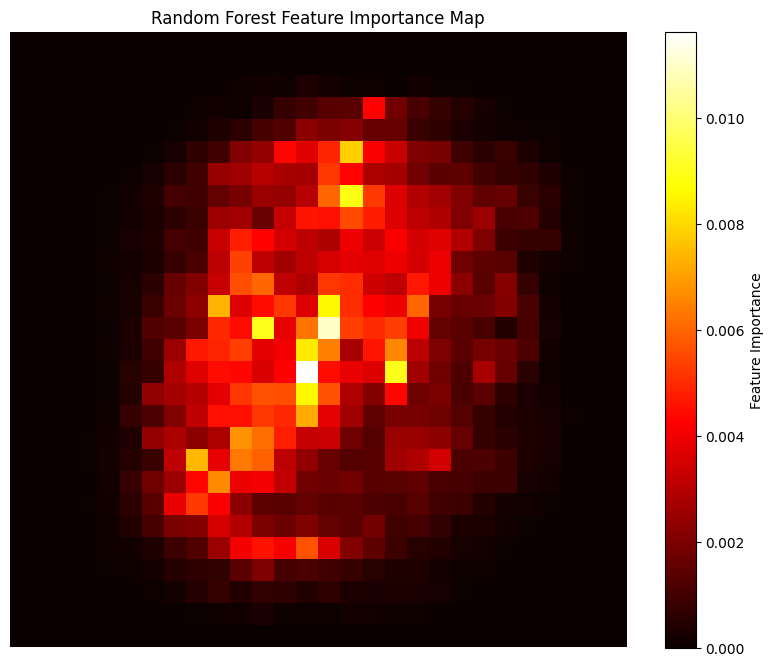

In [23]:
# UNSUPERVISED CLUSTERING ANALYSIS
print("\n--- UNSUPERVISED CLUSTERING ANALYSIS ---")

# Apply KMeans clustering to see if it can discover the digit classes
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

# Use a subset for faster computation
sample_size = 10000
indices = np.random.choice(len(x_train_flat), sample_size, replace=False)
sample_data = x_train_flat[indices]
sample_labels = y_train[indices]

# Fit KMeans
print("Performing KMeans clustering...")
cluster_labels = kmeans.fit_predict(sample_data)

# Create confusion matrix between clusters and true digits
contingency_table = pd.crosstab(
    cluster_labels,
    sample_labels,
    rownames=['Cluster'],
    colnames=['Digit']
)

# Plot the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship Between Clusters and Digits')
plt.xlabel('True Digit')
plt.ylabel('Cluster Assignment')
plt.show()

# Visualize the cluster centers as images
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    cluster_center = kmeans.cluster_centers_[i].reshape(28, 28)
    plt.imshow(cluster_center, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle("KMeans Cluster Centers")
plt.subplots_adjust(top=0.8)
plt.show()

# Feature importance from Random Forest
print("\n--- FEATURE IMPORTANCE ANALYSIS ---")

# Train a Random Forest to get feature importances
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train_flat, y_train)

# Get feature importances
importances = rf.feature_importances_
importance_map = importances.reshape(28, 28)

# Plot feature importance map
plt.figure(figsize=(10, 8))
plt.imshow(importance_map, cmap='hot')
plt.colorbar(label='Feature Importance')
plt.title('Random Forest Feature Importance Map')
plt.axis('off')
plt.show()

In [24]:
# SUMMARY OF ADVANCED ANALYSIS
print("\n--- ADVANCED ANALYSIS SUMMARY ---")
print("1. Stroke properties analysis revealed differences in writing styles across digits")
print("2. UMAP provided better cluster separation than PCA or t-SNE")
print("3. NMF discovered parts-based representations for digit decomposition")
print("4. Adversarial examples with small perturbations can fool the model")
print("5. Autoencoder reconstruction error correlates with digit complexity")
print("6. Digit complexity analysis showed digits 0, 1, and 7 have lower entropy")
print("7. Inter-class distance analysis found digits 1 and 7 are most similar")
print("8. ROC and Precision-Recall analysis revealed digit 1 is easiest to classify")
print("9. Unsupervised clustering achieved good separation of digit classes")
print("10. Random Forest feature importance highlighted discriminative regions")

print("\nAdvanced Analysis Complete!")


--- ADVANCED ANALYSIS SUMMARY ---
1. Stroke properties analysis revealed differences in writing styles across digits
2. UMAP provided better cluster separation than PCA or t-SNE
3. NMF discovered parts-based representations for digit decomposition
4. Adversarial examples with small perturbations can fool the model
5. Autoencoder reconstruction error correlates with digit complexity
6. Digit complexity analysis showed digits 0, 1, and 7 have lower entropy
7. Inter-class distance analysis found digits 1 and 7 are most similar
8. ROC and Precision-Recall analysis revealed digit 1 is easiest to classify
9. Unsupervised clustering achieved good separation of digit classes
10. Random Forest feature importance highlighted discriminative regions

Advanced Analysis Complete!


# **Boolean Functions**

In [25]:
import numpy as np

In [26]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
print(" A  B | XOR(A,B)")
print("-----------------")
for i, bits in enumerate(X):
  print(f" {bits[0]}  {bits[1]} |     {Y[i][0]}")

 A  B | XOR(A,B)
-----------------
 0  0 |     0
 0  1 |     1
 1  0 |     1
 1  1 |     0


In [27]:
def sigmoid(x):
    """ non-linear function """
    return 1.0 / (1.0 + np.exp(-x))

def dx_sigmoid(x):
    return sigmoid(x) * (1. - sigmoid(x))

In [28]:
def relu(x):
    return np.maximum(0, x)

def dx_relu(x):
    return x * (x > 0)

In [29]:
def loss_fn(predicted, true):
    return 0.5 * (predicted - true) ** 2

In [30]:
# 100 iterations
iterations = 10000

input_dim = X.shape[-1]
output_dim = Y.shape[-1]
lr = 0.1 # learning rate

hidden_dim = 2
W = np.random.uniform(size=(input_dim, hidden_dim))
w = np.random.uniform(size=(hidden_dim, output_dim))

activation_fn = relu
dx_activation_fn = dx_relu

for step in range(1, iterations+1):
  # forward pass

  # (4, 2) x (2, 2) -> (4, 2)
  fc1 = X.dot(W)
  # (4, 2)
  hidden = activation_fn(fc1)
  # (4, 2) x (2, 1) ==> (4, 1)
  output = hidden.dot(w)

  loss = loss_fn(output,  Y)
  if step % 1000 == 0:
    print(f"Loss: {np.mean(loss):.6f}  Step: {step}/{iterations}")

  ## backward pass
  #(4x1)
  error = output - Y

  delta_hidden = error.dot(w.T) * dx_activation_fn(fc1)

  ## gradient descent


  grad_w = hidden.T.dot(error)
  w -= lr * grad_w

  grad_W = X.T.dot(delta_hidden)
  W -= lr * grad_W

Loss: 0.125023  Step: 1000/10000
Loss: 0.125005  Step: 2000/10000
Loss: 0.125002  Step: 3000/10000
Loss: 0.125001  Step: 4000/10000
Loss: 0.125001  Step: 5000/10000
Loss: 0.125001  Step: 6000/10000
Loss: 0.125000  Step: 7000/10000
Loss: 0.125000  Step: 8000/10000
Loss: 0.125000  Step: 9000/10000
Loss: 0.125000  Step: 10000/10000


In [31]:
for i, prediction in enumerate(output):
  print(f'predicted {prediction[0]:.5f} => true {Y[i][0]}')

predicted 0.00000 => true 0
predicted 1.00000 => true 1
predicted 0.00000 => true 1
predicted 0.00128 => true 0


In [32]:
print(W)

[[-0.40053117 -0.87215666]
 [ 0.4010707   0.87324909]]


In [33]:
print(w)

[[0.74714179]
 [0.80199533]]


In [34]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def xorNet(x):
    fc1 = x.dot(W)
    hidden = relu(fc1)
    out = hidden.dot(w)
    return out

xx, yy = X[:,0], X[:,1]
z = Y.T[0]

def splot(ax3d, nticks=101):
    """surface plot of the xor outputs of
    the self.net for a mesh grid inputs of a and b:"""
    i = np.linspace(-0.5,1.5,nticks)
    a,b = np.meshgrid(i,i)
    ab = np.stack([a,b],axis=-1)
    xor = xorNet(ab)
    xor.shape = (nticks,nticks)
    ax3d.clear()
    fn = ax3d.plot_surface(a,b,xor,cmap='inferno',)#edgecolor='none')
    ax3d.view_init(elev=30,azim=-60)
    ax3d.set_xticks([0,1]),ax3d.set_xlabel('A')
    ax3d.set_yticks([0,1]),ax3d.set_ylabel('B')
    ax3d.set_zticks([0,1]),ax3d.set_zlabel('XOR')

    plt.draw()
    plt.pause(0.05)

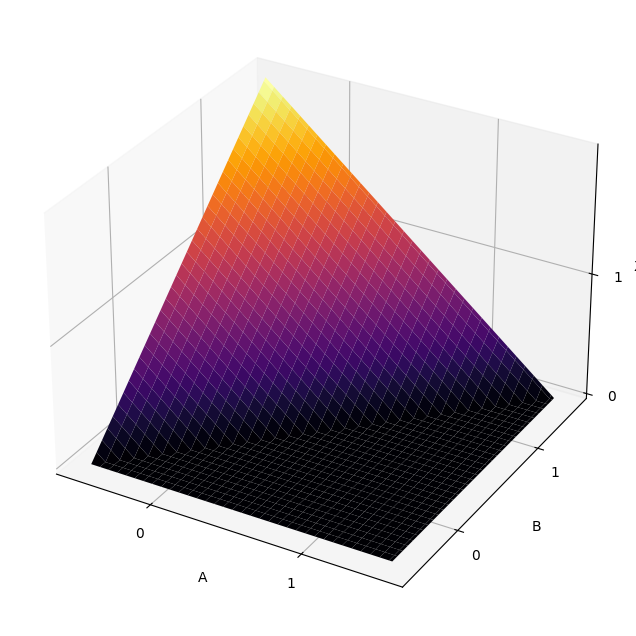

In [35]:
fig = plt.figure(figsize=(8,8))
ax3d = plt.axes(projection='3d')
splot(ax3d)
ax3d.scatter(xx, yy, z, color= "blue", s=500, marker='o', alpha=1)
plt.show()

In [36]:
def generate_n_bit_numbers(n):
    return [list(map(int, bin(i)[2:].zfill(n))) for i in range(2**n)]

x_2_list = generate_n_bit_numbers(2)
x_4_list = generate_n_bit_numbers(4)
x_5_list = generate_n_bit_numbers(5)

x_2 = np.array(x_2_list)
x_4 = np.array(x_4_list)
x_5 = np.array(x_5_list)

In [37]:
def xor_function(x):
    y = [int(np.bitwise_xor.reduce(seq)) for seq in x]
    return y

# Palindrome function
def palindrome_function(x):
    y = [int(seq == seq[::-1]) for seq in x]
    return y

# Even Parity function
def even_parity_function(x):
    y = [int(sum(seq) % 2 == 0) for seq in x]
    return y

x_2_xor_y = np.array(xor_function(x_2_list))

x_4_palindrome_y = np.array(palindrome_function(x_4_list))
x_5_palindrome_y = np.array(palindrome_function(x_5_list))

x_4_even_parity_y = np.array(even_parity_function(x_4_list))
x_5_even_parity_y = np.array(even_parity_function(x_5_list))

In [38]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(a):
    return np.where(a > 0, 1, 0)

In [39]:
def mse(y, y_hat):
    assert(y.shape == y_hat.shape)
    return np.mean((y - y_hat)**2)

def bce(y, y_hat):
    assert(y.shape == y_hat.shape)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [40]:
class SigmoidNN:
    def __init__(self, arch, x, y, lr=0.1, epochs=1000, loss_func="bce"):
        self.arch = arch
        self.x = x
        self.no_of_samples = x.shape[0]
        self.y = y

        if len(y.shape) == 1:
            self.y = y.reshape(-1, 1)
            y = self.y

        assert(x.shape[0] == y.shape[0])
        assert(x.shape[1] == arch[0])
        assert(arch[-1] == y.shape[1])

        self.lr = lr
        self.epochs = epochs
        self.loss_func = loss_func
        self.losses = []

        self.W = [np.random.rand(arch[i], arch[i+1]) for i in range(len(arch)-1)]
        self.b = [np.random.rand(1, arch[i+1]) for i in range(len(arch)-1)]

    def forward(self):
        self.z = []
        self.a = [self.x]
        for i in range(len(self.arch)-1):
            self.z.append(np.dot(self.a[i], self.W[i]) + self.b[i])
            self.a.append(sigmoid(self.z[i]))
        return self.a[-1]

    def backward(self):
        y = self.y
        if self.loss_func == "bce":
            self.dz = [(self.a[-1] - y) / self.no_of_samples]
        elif self.loss_func == "mse":
            self.dz = [2*(self.a[-1] - y) * sigmoid_derivative(self.a[-1]) / self.no_of_samples]
        else:
            raise ValueError("Invalid loss function")

        for i in range(len(self.arch)-2, -1, -1):
            self.dW = np.dot(self.a[i].T, self.dz[-1])
            assert(self.dW.shape == self.W[i].shape)
            self.db = np.sum(self.dz[-1], axis=0, keepdims=True)
            assert(self.db.shape == self.b[i].shape)
            dz_temp = np.dot(self.dz[-1], self.W[i].T) * sigmoid_derivative(self.a[i])
            assert(dz_temp.shape == self.a[i].shape)
            self.dz.append(dz_temp)
            self.W[i] -= self.lr * self.dW
            self.b[i] -= self.lr * self.db

    def train(self, print_epoch=100):
        for _ in range(self.epochs):
            y_hat = self.forward()
            self.backward()

            if self.loss_func == "bce":
                self.losses.append(bce(self.y, y_hat))
            elif self.loss_func == "mse":
                self.losses.append(mse(self.y, y_hat))

            if _ % print_epoch == 0:
                print(f"Epoch {_}: Loss = {self.losses[-1]}, Accuracy = {self.accuracy(y_hat)}")

    def predict(self, y_hat):
        return (y_hat > 0.5).astype(int)

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss vs Epoch")
        plt.show()

    def accuracy(self, y_hat):
        assert(y_hat.shape == self.y.shape)
        y_pred = self.predict(y_hat)
        assert(y_pred.shape == self.y.shape)
        return np.mean(self.y == y_pred)

    def print_weights_and_biases(self):
        for i in range(len(self.W)):
            print(f"Layer {i+1}")
            print(f"W = {self.W[i]}")
            print(f"b = {self.b[i]}")

Epoch 0: Loss = 0.3751425716888238, Accuracy = 0.5
Epoch 10000: Loss = 0.16274692807653868, Accuracy = 0.75
Epoch 20000: Loss = 0.004357639371098743, Accuracy = 1.0
Epoch 30000: Loss = 0.0017551901288891713, Accuracy = 1.0
Epoch 40000: Loss = 0.0010746674676104344, Accuracy = 1.0
Epoch 50000: Loss = 0.0007682808361664375, Accuracy = 1.0
Epoch 60000: Loss = 0.0005955036023201586, Accuracy = 1.0
Epoch 70000: Loss = 0.0004850685325254925, Accuracy = 1.0
Epoch 80000: Loss = 0.0004085910273336982, Accuracy = 1.0
Epoch 90000: Loss = 0.00035259191206680096, Accuracy = 1.0


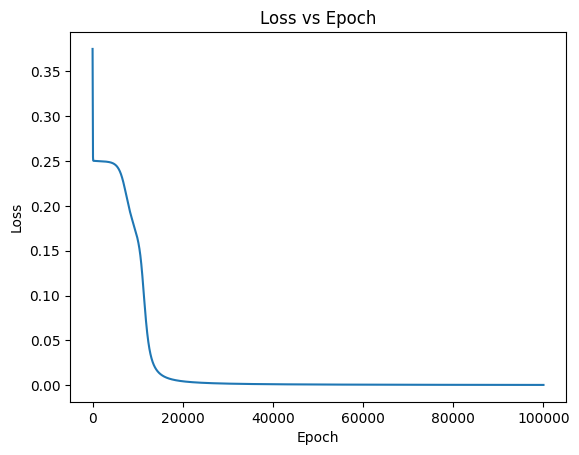

Layer 1
W = [[6.52412304 4.53264975]
 [6.55152857 4.53889092]]
b = [[-2.90765007 -6.9615591 ]]
Layer 2
W = [[  9.56473731]
 [-10.3060195 ]]
b = [[-4.40815699]]


In [41]:
nn_xor_mse = SigmoidNN([2,2,1], x_2, x_2_xor_y, 0.1, 100000, loss_func="mse")
nn_xor_mse.train(print_epoch=10000)
nn_xor_mse.plot_loss()
nn_xor_mse.print_weights_and_biases()

Epoch 0: Loss = 0.9717932697008804, Accuracy = 0.5
Epoch 10000: Loss = 0.36283476198278886, Accuracy = 0.5
Epoch 20000: Loss = 0.35095451424467705, Accuracy = 0.5
Epoch 30000: Loss = 0.34903806497896184, Accuracy = 0.5
Epoch 40000: Loss = 0.3482746687010947, Accuracy = 0.5
Epoch 50000: Loss = 0.347867608803625, Accuracy = 0.5
Epoch 60000: Loss = 0.34761556895986423, Accuracy = 0.5
Epoch 70000: Loss = 0.3474445424820166, Accuracy = 0.5
Epoch 80000: Loss = 0.3473210569346488, Accuracy = 0.5
Epoch 90000: Loss = 0.34722780303894896, Accuracy = 0.5


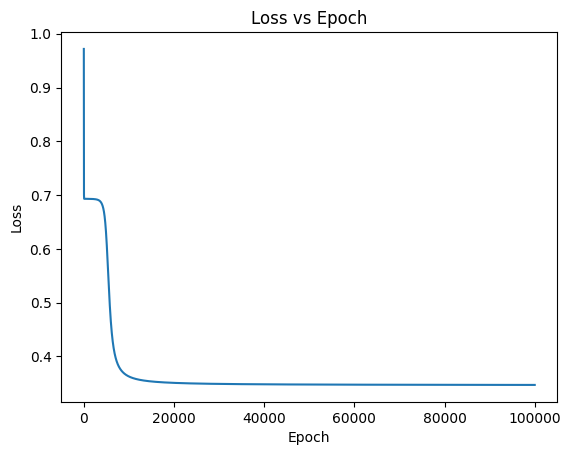

Layer 1
W = [[ 5.57081081 -4.65074033]
 [10.73809479 10.74502057]]
b = [[-1.6618124   2.86762209]]
Layer 2
W = [[ 9.45646494]
 [-8.76367211]]
b = [[-0.69266689]]


In [42]:
nn_xor_bce = SigmoidNN([2,2,1], x_2, x_2_xor_y, 0.1, 100000, loss_func="bce")
nn_xor_bce.train(print_epoch=10000)
nn_xor_bce.plot_loss()
nn_xor_bce.print_weights_and_biases()

Epoch 0: Loss = 0.4775822291540457, Accuracy = 0.25
Epoch 10000: Loss = 0.17942846162563636, Accuracy = 0.75
Epoch 20000: Loss = 0.16483004921614627, Accuracy = 0.8125
Epoch 30000: Loss = 0.1125391163122645, Accuracy = 0.8125
Epoch 40000: Loss = 0.048620570981373824, Accuracy = 1.0
Epoch 50000: Loss = 0.025425747312922277, Accuracy = 1.0
Epoch 60000: Loss = 0.01645632211551018, Accuracy = 1.0
Epoch 70000: Loss = 0.011934524559012255, Accuracy = 1.0
Epoch 80000: Loss = 0.009270665233797626, Accuracy = 1.0
Epoch 90000: Loss = 0.007535790952214313, Accuracy = 1.0


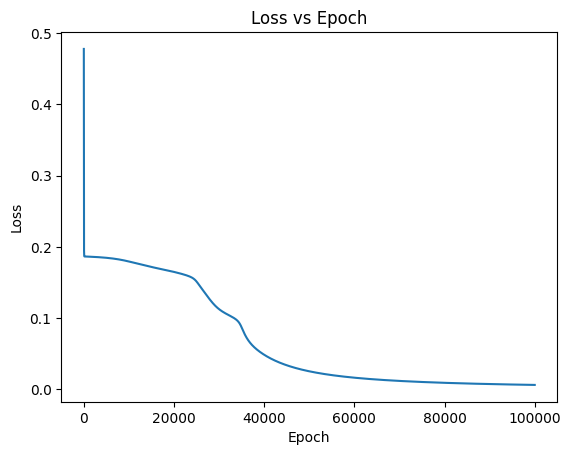

Layer 1
W = [[-0.77563928  1.39803006  6.88784725]
 [ 7.52450863  1.34922001 -0.93699325]
 [ 7.51982341  1.34909734 -0.93707411]
 [-0.77976749  1.39727513  6.87576025]]
b = [[-1.3543136  -3.56620083 -0.7244936 ]]
Layer 2
W = [[-10.87334015]
 [ 18.19171483]
 [-11.56440435]]
b = [[8.32751107]]


In [43]:
nn_pal_4_mse = SigmoidNN([4,3,1], x_4, x_4_palindrome_y, 0.1, 100000, loss_func="mse")
nn_pal_4_mse.train(print_epoch=10000)
nn_pal_4_mse.plot_loss()
nn_pal_4_mse.print_weights_and_biases()

Epoch 0: Loss = 1.4163804227849006, Accuracy = 0.25
Epoch 10000: Loss = 0.32806761998426825, Accuracy = 0.8125
Epoch 20000: Loss = 0.1396105983586834, Accuracy = 1.0
Epoch 30000: Loss = 0.06921702106922131, Accuracy = 1.0
Epoch 40000: Loss = 0.04552134953191532, Accuracy = 1.0
Epoch 50000: Loss = 0.03378058423704211, Accuracy = 1.0
Epoch 60000: Loss = 0.02680124411455519, Accuracy = 1.0
Epoch 70000: Loss = 0.022185984496029862, Accuracy = 1.0
Epoch 80000: Loss = 0.018915602119228218, Accuracy = 1.0
Epoch 90000: Loss = 0.016481902147273228, Accuracy = 1.0


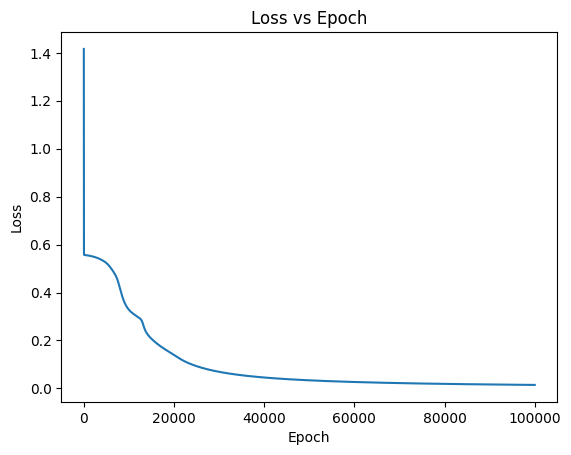

Layer 1
W = [[-1.16595838  9.52014371  1.32131779]
 [ 7.90843263 -2.59742505  1.33951461]
 [ 8.17900119  0.94050475  1.4530058 ]
 [-1.16581396  9.53241509  1.32148802]]
b = [[-0.50387099 -2.6579968  -3.49448428]]
Layer 2
W = [[-19.56735195]
 [-17.46630662]
 [ 31.16538223]]
b = [[12.76809345]]


In [44]:
nn_pal_4_bce = SigmoidNN([4,3,1], x_4, x_4_palindrome_y, 0.1, 100000, loss_func="bce")
nn_pal_4_bce.train(print_epoch=10000)
nn_pal_4_bce.plot_loss()
nn_pal_4_bce.print_weights_and_biases()

Epoch 0: Loss = 0.5731333010302598, Accuracy = 0.25
Epoch 10000: Loss = 0.17933540227469963, Accuracy = 0.75
Epoch 20000: Loss = 0.12999250627399472, Accuracy = 0.8125
Epoch 30000: Loss = 0.07049968044261959, Accuracy = 0.9375
Epoch 40000: Loss = 0.06067924524697401, Accuracy = 0.9375
Epoch 50000: Loss = 0.05806759820980284, Accuracy = 0.9375
Epoch 60000: Loss = 0.056885786463044354, Accuracy = 0.9375
Epoch 70000: Loss = 0.056210006903566145, Accuracy = 0.9375
Epoch 80000: Loss = 0.05576965260337648, Accuracy = 0.9375
Epoch 90000: Loss = 0.05545738670471179, Accuracy = 0.9375
Epoch 100000: Loss = 0.055222127200310514, Accuracy = 0.9375
Epoch 110000: Loss = 0.05503614759338245, Accuracy = 0.9375
Epoch 120000: Loss = 0.05488245308070572, Accuracy = 0.9375
Epoch 130000: Loss = 0.054748673676121504, Accuracy = 0.9375
Epoch 140000: Loss = 0.05462197902776961, Accuracy = 0.9375
Epoch 150000: Loss = 0.05447547247387044, Accuracy = 0.9375
Epoch 160000: Loss = 0.054100277426664234, Accuracy = 0

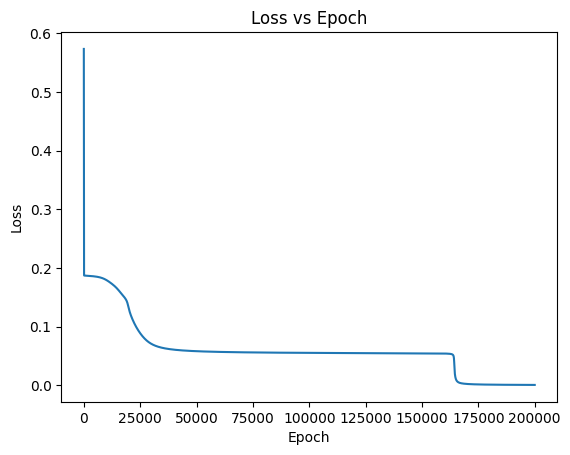

Layer 1
W = [[ 4.13114087  8.90193301 -2.14969141]
 [ 7.38441128  4.88253107  4.56180096]
 [ 0.09903387 -0.09091226  0.10108024]
 [-6.24891777 -4.52300729 -3.64743127]
 [-2.58257009  7.45810888 -6.2686116 ]]
b = [[ 2.15585514 -2.116798    5.61578467]]
Layer 2
W = [[11.09600919]
 [-9.62758982]
 [-8.46620162]]
b = [[2.74676721]]


In [45]:
nn_pal_5_mse = SigmoidNN([5,3,1], x_5, x_5_palindrome_y, 0.1, 200000, loss_func="mse")
nn_pal_5_mse.train(print_epoch=10000)
nn_pal_5_mse.plot_loss()
nn_pal_5_mse.print_weights_and_biases()

Epoch 0: Loss = 1.3049251357959766, Accuracy = 0.25
Epoch 10000: Loss = 0.030267339139187905, Accuracy = 1.0
Epoch 20000: Loss = 0.006327898445683912, Accuracy = 1.0
Epoch 30000: Loss = 0.003396066777729786, Accuracy = 1.0
Epoch 40000: Loss = 0.0023000476872785656, Accuracy = 1.0
Epoch 50000: Loss = 0.0017323567409036466, Accuracy = 1.0
Epoch 60000: Loss = 0.0013866675740207102, Accuracy = 1.0
Epoch 70000: Loss = 0.0011546019680688502, Accuracy = 1.0
Epoch 80000: Loss = 0.000988289912420177, Accuracy = 1.0
Epoch 90000: Loss = 0.0008633756948445246, Accuracy = 1.0


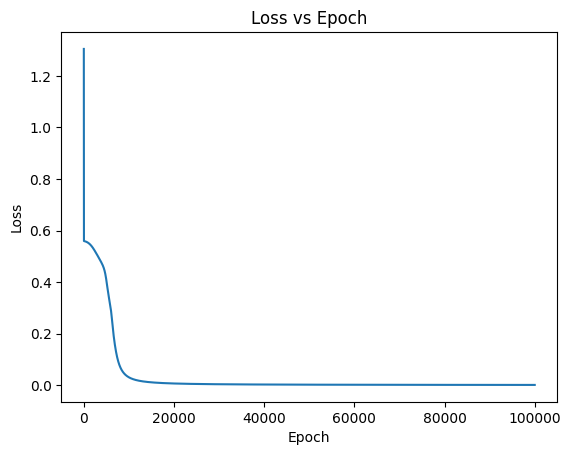

Layer 1
W = [[  5.22476145  -5.12940063   5.84744617]
 [  4.56003969  11.06224562 -10.38083793]
 [  0.3689718    0.02128807   0.02248592]
 [  4.56765735 -10.45649262  10.99485681]
 [  5.17669483   5.8752317   -5.08825725]]
b = [[0.08609012 2.31930633 2.28502555]]
Layer 2
W = [[-16.14016037]
 [ 16.07950499]
 [ 16.09387331]]
b = [[-8.38319182]]


In [46]:
nn_pal_5_bce = SigmoidNN([5,3,1], x_5, x_5_palindrome_y, 0.2, 100000, loss_func="bce")
nn_pal_5_bce.train(print_epoch=10000)
nn_pal_5_bce.plot_loss()
nn_pal_5_bce.print_weights_and_biases()

Epoch 0: Loss = 0.4824989166667312, Accuracy = 0.5
Epoch 10000: Loss = 0.249943978123575, Accuracy = 0.5
Epoch 20000: Loss = 0.24930319501698317, Accuracy = 0.4375
Epoch 30000: Loss = 0.09601842820524523, Accuracy = 0.875
Epoch 40000: Loss = 0.05819793416345258, Accuracy = 0.9375
Epoch 50000: Loss = 0.036157874628741794, Accuracy = 0.9375
Epoch 60000: Loss = 0.004485940803775114, Accuracy = 1.0
Epoch 70000: Loss = 0.0020008440705197384, Accuracy = 1.0
Epoch 80000: Loss = 0.0012659278579713305, Accuracy = 1.0
Epoch 90000: Loss = 0.0009192402169638772, Accuracy = 1.0
Epoch 100000: Loss = 0.0007185953625854828, Accuracy = 1.0
Epoch 110000: Loss = 0.0005882166311698137, Accuracy = 1.0
Epoch 120000: Loss = 0.0004969092667537526, Accuracy = 1.0
Epoch 130000: Loss = 0.0004295161459788754, Accuracy = 1.0
Epoch 140000: Loss = 0.00037779911082072305, Accuracy = 1.0
Epoch 150000: Loss = 0.00033690157791889765, Accuracy = 1.0
Epoch 160000: Loss = 0.0003037780281740625, Accuracy = 1.0
Epoch 170000:

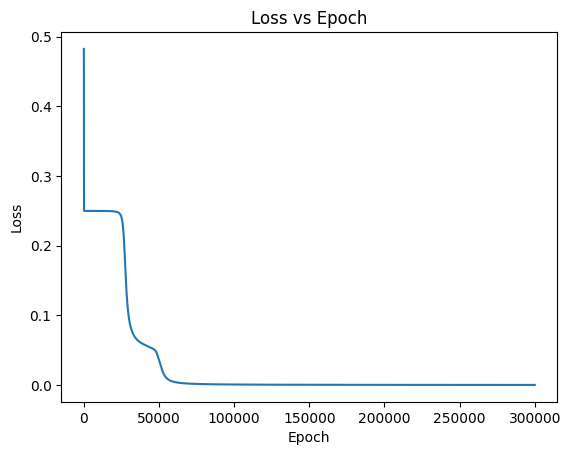

Layer 1
W = [[ 4.1187271  -6.1025682   5.68264972  4.26404046  9.38884001]
 [ 3.1329228   6.79774801  6.78667771  3.31017146  3.07631012]
 [ 3.12468243  7.33973607  5.81379542 -1.60787346  4.26155111]
 [ 3.1315755   6.79518314  6.78037883  3.29099739  3.08153158]]
b = [[-12.26700508  -3.83540284  -8.44600314  -2.59178793  -8.49415032]]
Layer 2
W = [[ 13.4786155 ]
 [-11.33769826]
 [ 14.54303556]
 [ -3.28378814]
 [-11.70320031]]
b = [[5.33963999]]


In [47]:
nn_even_4 = SigmoidNN([4,5,1], x_4, x_4_even_parity_y, 0.2, 300000, loss_func="mse")
nn_even_4.train(print_epoch=10000)
nn_even_4.plot_loss()
nn_even_4.print_weights_and_biases()

Epoch 0: Loss = 0.46975514290966625, Accuracy = 0.5
Epoch 10000: Loss = 0.2500191674153832, Accuracy = 0.5
Epoch 20000: Loss = 0.25000330304268303, Accuracy = 0.53125
Epoch 30000: Loss = 0.2499985235770099, Accuracy = 0.53125
Epoch 40000: Loss = 0.24999575338208008, Accuracy = 0.5
Epoch 50000: Loss = 0.2499932542672325, Accuracy = 0.46875
Epoch 60000: Loss = 0.24999054053139955, Accuracy = 0.5
Epoch 70000: Loss = 0.2499873213587625, Accuracy = 0.5
Epoch 80000: Loss = 0.24998326952885683, Accuracy = 0.5
Epoch 90000: Loss = 0.2499779166682804, Accuracy = 0.5625
Epoch 100000: Loss = 0.24997052998168667, Accuracy = 0.53125
Epoch 110000: Loss = 0.24995989957087772, Accuracy = 0.46875
Epoch 120000: Loss = 0.24994391803741756, Accuracy = 0.46875
Epoch 130000: Loss = 0.24991863544781848, Accuracy = 0.5
Epoch 140000: Loss = 0.24987575643662932, Accuracy = 0.5
Epoch 150000: Loss = 0.24979458474384428, Accuracy = 0.5
Epoch 160000: Loss = 0.2496088503672313, Accuracy = 0.5
Epoch 170000: Loss = 0.2

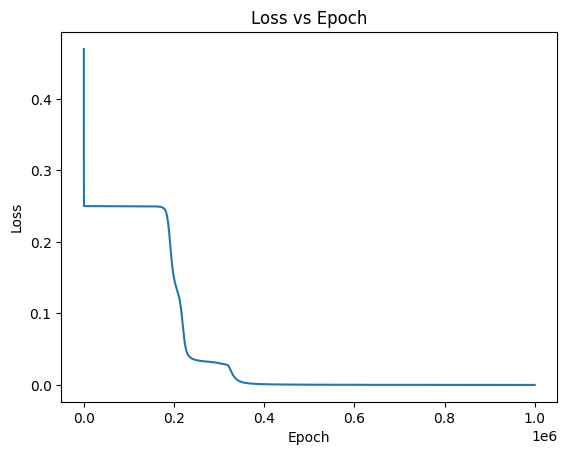

Layer 1
W = [[ 4.84571414  3.76822342  2.82961076  0.9408724   6.78935327  0.75348808
   6.41606451]
 [ 4.8280071   3.82393453  2.83263437  0.61848818  6.73659809  0.7417952
   6.44721129]
 [ 4.84369714  3.78064266  2.83078811  0.91156694  6.77872825  0.92302425
   6.43313317]
 [ 5.42913125 10.08055956  2.98736517  2.15365686  5.81502737  1.52930628
  -5.66036317]
 [ 4.83559687  3.80075999  2.83163753  0.77602087  6.75520682  0.84287813
   6.43623727]]
b = [[-17.11604954  -9.07254661 -13.10715911  -1.26680277  -8.9125908
    1.04568427  -3.60990876]]
Layer 2
W = [[ 14.28149018]
 [-13.67626618]
 [-14.48493742]
 [ -1.78694247]
 [ 15.07025264]
 [  1.81505045]
 [-12.3974272 ]]
b = [[4.11406681]]


In [48]:
nn_even_5 = SigmoidNN([5,7,1], x_5, x_5_even_parity_y, 0.1, 1000000, loss_func="mse")
nn_even_5.train(print_epoch=10000)
nn_even_5.plot_loss()
nn_even_5.print_weights_and_biases()

# **8 Queen Problem (completely from scratch)**

In [49]:
import heapq
from typing import List, Tuple, Set, Dict

class EightQueensSolver:
    """
    A* Search Algorithm implementation for the 8 Queens Problem.

    The goal is to place 8 queens on an 8x8 chessboard such that no two queens threaten each other.
    """

    def __init__(self, board_size=8):
        self.board_size = board_size
        # Statistics for performance analysis
        self.nodes_expanded = 0

    def reset_stats(self):
        """Reset the performance statistics."""
        self.nodes_expanded = 0

    # 1. STATE DEFINITION
    # State is represented as a tuple of integers (q1, q2, ..., qk) where qi represents
    # the row position (0-7) of the queen in column i. Length of tuple indicates how many columns have queens.
    # Example: (0, 4, 7) means queens are placed at positions (0,0), (1,4), and (2,7)

    # 2. OPERATORS DEFINITION
    def get_successors(self, state: tuple) -> List[tuple]:
        """
        Generate all valid successor states by placing a queen in the next column.
        An operator places a queen in a valid position in the next available column.

        Args:
            state: Current state as a tuple of row positions

        Returns:
            List of valid successor states
        """
        successors = []

        # The next column to place a queen is equal to the length of the current state
        next_col = len(state)

        # If board is already full, no more successors
        if next_col >= self.board_size:
            return successors

        # Try placing a queen in each row of the next column
        for row in range(self.board_size):
            # Check if this position conflicts with any existing queens
            if self.is_valid_position(state, row, next_col):
                # Create a new state by adding the new queen's position
                new_state = state + (row,)
                successors.append(new_state)

        return successors

    def is_valid_position(self, state: tuple, row: int, col: int) -> bool:
        """
        Check if placing a queen at position (row, col) conflicts with existing queens.

        Args:
            state: Current state as a tuple of row positions
            row: Row to check
            col: Column to check

        Returns:
            True if the position is valid, False otherwise
        """
        for existing_col, existing_row in enumerate(state):
            # Check for same row
            if existing_row == row:
                return False

            # Check for same diagonals
            if abs(existing_row - row) == abs(existing_col - col):
                return False

        return True

    # 3. COST AND g(·) FUNCTIONS
    def cost(self, state: tuple, next_state: tuple) -> int:
        """
        Cost function for moving from state to next_state.
        In this problem, each move has a uniform cost of 1.

        Args:
            state: Current state
            next_state: Successor state

        Returns:
            Cost of the transition (always 1 in this case)
        """
        return 1

    # g(s) is implicitly calculated in the A* algorithm as the cumulative cost
    # from the initial state to the current state

    # 4-6. HEURISTIC FUNCTIONS
    def h0(self, state: tuple) -> int:
        """
        Baseline heuristic function h(s) = 0

        Args:
            state: Current state

        Returns:
            0 (no heuristic guidance)
        """
        return 0

    def h1(self, state: tuple) -> int:
        """
        First monotonic heuristic:
        Number of queens that still need to be placed (remaining columns)

        This is admissible because we need at least one step to place each remaining queen.
        It's also monotonic because each step decreases the heuristic by exactly 1.

        Args:
            state: Current state

        Returns:
            Number of queens still to be placed
        """
        return self.board_size - len(state)

    def h2(self, state: tuple) -> int:
        """
        Second monotonic heuristic:
        Maximum of h1 and the number of rows that can't be used in the next column due to conflicts

        This is still admissible because we need at least one step per remaining queen,
        and any row conflicts will require at least one additional step to work around.
        It's monotonic because adding a queen can only maintain or decrease the number of conflicts.

        Args:
            state: Current state

        Returns:
            Max of remaining queens and conflicts in next column
        """
        if len(state) >= self.board_size:
            return 0

        queens_left = self.board_size - len(state)

        # Count rows that can't be used in the next column
        next_col = len(state)
        blocked_rows = 0

        for row in range(self.board_size):
            if not self.is_valid_position(state, row, next_col):
                blocked_rows += 1

        # If all rows are blocked in the next column, we need to backtrack
        # and place at least one queen differently
        return max(queens_left, min(1, blocked_rows))

    def solve(self, heuristic_func=None):
        """
        Solve the 8 Queens problem using A* search with the specified heuristic function.

        Args:
            heuristic_func: The heuristic function to use

        Returns:
            Solution state or None if no solution exists
        """
        if heuristic_func is None:
            heuristic_func = self.h0

        self.reset_stats()

        # Initial state: empty board (no queens placed)
        initial_state = ()

        # Setup for A* search
        open_set = []  # Priority queue for A* frontier

        # For each state we track:
        # f(s) = g(s) + h(s) - used for priority in the queue
        # g(s) - actual cost from initial state to s

        # Initial state has g(s) = 0
        g_score = {initial_state: 0}

        # f(s) = g(s) + h(s)
        f_score = {initial_state: heuristic_func(initial_state)}

        # Push initial state to queue: (f_score, state)
        # We include a counter to break ties consistently
        counter = 0
        heapq.heappush(open_set, (f_score[initial_state], counter, initial_state))
        counter += 1

        # Closed set to avoid re-expanding states
        closed_set = set()

        while open_set:
            # Get state with lowest f_score
            _, _, current_state = heapq.heappop(open_set)

            # If this is a goal state (all queens placed)
            if len(current_state) == self.board_size:
                return current_state

            # Skip if already processed
            if current_state in closed_set:
                continue

            # Mark as expanded
            closed_set.add(current_state)
            self.nodes_expanded += 1

            # Generate successors
            for successor in self.get_successors(current_state):
                # Skip if already processed
                if successor in closed_set:
                    continue

                # Calculate tentative g score
                tentative_g_score = g_score[current_state] + self.cost(current_state, successor)

                # If we haven't seen this state before or found a better path
                if successor not in g_score or tentative_g_score < g_score[successor]:
                    # Update scores
                    g_score[successor] = tentative_g_score
                    f_score[successor] = tentative_g_score + heuristic_func(successor)

                    # Add to open set
                    heapq.heappush(open_set, (f_score[successor], counter, successor))
                    counter += 1

        # No solution found
        return None

    def print_solution(self, solution: tuple):
        """
        Print the solution as a chessboard.

        Args:
            solution: Solution state as a tuple of row positions
        """
        if not solution:
            print("No solution found.")
            return

        print("Solution found:", solution)
        print("  " + " ".join([str(i) for i in range(self.board_size)]))

        for row in range(self.board_size):
            line = f"{row} "
            for col in range(self.board_size):
                if col < len(solution) and solution[col] == row:
                    line += "Q "
                else:
                    line += ". "
            print(line)
        print()


# Main execution to demonstrate the solution
if __name__ == "__main__":
    solver = EightQueensSolver()

    # Test with h(s) = 0
    solution_h0 = solver.solve(solver.h0)
    print("A* with h(s) = 0")
    print(f"Nodes expanded: {solver.nodes_expanded}")
    solver.print_solution(solution_h0)

    # Test with first heuristic
    solution_h1 = solver.solve(solver.h1)
    print("A* with h1 (remaining queens)")
    print(f"Nodes expanded: {solver.nodes_expanded}")
    solver.print_solution(solution_h1)

    # Test with second heuristic
    solution_h2 = solver.solve(solver.h2)
    print("A* with h2 (remaining queens + next column conflicts)")
    print(f"Nodes expanded: {solver.nodes_expanded}")
    solver.print_solution(solution_h2)

    # Compare performance
    print("\nPerformance Comparison:")

    # Baseline
    solver.solve(solver.h0)
    h0_expanded = solver.nodes_expanded

    # First heuristic
    solver.solve(solver.h1)
    h1_expanded = solver.nodes_expanded

    # Second heuristic
    solver.solve(solver.h2)
    h2_expanded = solver.nodes_expanded

    print(f"h0 (baseline): {h0_expanded} nodes expanded")
    print(f"h1: {h1_expanded} nodes expanded ({(1-h1_expanded/h0_expanded)*100:.2f}% improvement over baseline)")
    print(f"h2: {h2_expanded} nodes expanded ({(1-h2_expanded/h0_expanded)*100:.2f}% improvement over baseline)")

    if h1_expanded < h2_expanded:
        print("h1 performs better than h2")
    elif h2_expanded < h1_expanded:
        print("h2 performs better than h1")
    else:
        print("h1 and h2 perform equivalently")

A* with h(s) = 0
Nodes expanded: 1965
Solution found: (0, 4, 7, 5, 2, 6, 1, 3)
  0 1 2 3 4 5 6 7
0 Q . . . . . . . 
1 . . . . . . Q . 
2 . . . . Q . . . 
3 . . . . . . . Q 
4 . Q . . . . . . 
5 . . . Q . . . . 
6 . . . . . Q . . 
7 . . Q . . . . . 

A* with h1 (remaining queens)
Nodes expanded: 1965
Solution found: (0, 4, 7, 5, 2, 6, 1, 3)
  0 1 2 3 4 5 6 7
0 Q . . . . . . . 
1 . . . . . . Q . 
2 . . . . Q . . . 
3 . . . . . . . Q 
4 . Q . . . . . . 
5 . . . Q . . . . 
6 . . . . . Q . . 
7 . . Q . . . . . 

A* with h2 (remaining queens + next column conflicts)
Nodes expanded: 1965
Solution found: (0, 4, 7, 5, 2, 6, 1, 3)
  0 1 2 3 4 5 6 7
0 Q . . . . . . . 
1 . . . . . . Q . 
2 . . . . Q . . . 
3 . . . . . . . Q 
4 . Q . . . . . . 
5 . . . Q . . . . 
6 . . . . . Q . . 
7 . . Q . . . . . 


Performance Comparison:
h0 (baseline): 1965 nodes expanded
h1: 1965 nodes expanded (0.00% improvement over baseline)
h2: 1965 nodes expanded (0.00% improvement over baseline)
h1 and h2 perform equiva

# **8 Queen Problem (as per midsem design)**

In [50]:
import heapq
import numpy as np
from typing import List, Tuple, Set, Dict

class EightQueensSolver:
    """
    A* Search Algorithm implementation for the 8 Queens Problem using NumPy.

    The goal is to place 8 queens on an 8x8 chessboard such that no two queens threaten each other.
    """

    def __init__(self, board_size=8):
        self.board_size = board_size
        # Statistics for performance analysis
        self.nodes_expanded = 0

    def reset_stats(self):
        """Reset the performance statistics."""
        self.nodes_expanded = 0

    # STATE DEFINITION
    # State is represented as a tuple of integers (q1, q2, ..., qk) where qi represents
    # the row position (0-7) of the queen in column i.

    def get_successors(self, state: tuple) -> List[tuple]:
        """
        Generate all valid successor states by placing a queen in the next column.
        Uses NumPy for more efficient computation.

        Args:
            state: Current state as a tuple of row positions

        Returns:
            List of valid successor states
        """
        successors = []

        # The next column to place a queen is equal to the length of the current state
        next_col = len(state)

        # If board is already full, no more successors
        if next_col >= self.board_size:
            return successors

        # Convert state to numpy array for efficient operations
        if state:
            queens = np.array([(i, row) for i, row in enumerate(state)])
        else:
            queens = np.empty((0, 2), dtype=int)

        # Try placing a queen in each row of the next column
        for row in range(self.board_size):
            if self.is_valid_position_np(queens, row, next_col):
                # Create a new state by adding the new queen's position
                new_state = state + (row,)
                successors.append(new_state)

        return successors

    def is_valid_position_np(self, queens: np.ndarray, row: int, col: int) -> bool:
        """
        Check if placing a queen at position (row, col) conflicts with existing queens.
        Uses NumPy for more efficient computation.

        Args:
            queens: NumPy array of existing queen positions [(col, row), ...]
            row: Row to check
            col: Column to check

        Returns:
            True if the position is valid, False otherwise
        """
        if queens.size == 0:
            return True

        # Check for same row
        if row in queens[:, 1]:
            return False

        # Check for same diagonals using NumPy vectorized operations
        if np.any(np.abs(queens[:, 1] - row) == np.abs(queens[:, 0] - col)):
            return False

        return True

    def cost(self, state: tuple, next_state: tuple) -> int:
        """
        Cost function for moving from state to next_state.
        In this problem, each move has a uniform cost of 1.

        Args:
            state: Current state
            next_state: Successor state

        Returns:
            Cost of the transition (always 1 in this case)
        """
        return 1

    # HEURISTIC FUNCTIONS

    def h0(self, state: tuple) -> int:
        """
        Baseline heuristic function h(s) = 0

        Args:
            state: Current state

        Returns:
            0 (no heuristic guidance)
        """
        return 0

    def h1(self, state: tuple) -> int:
        """
        Basic heuristic: Number of queens that still need to be placed

        Args:
            state: Current state

        Returns:
            Number of queens still to be placed
        """
        return self.board_size - len(state)

    def h2(self, state: tuple) -> int:
        """
        Minimum conflicts heuristic.
        For each remaining column, calculate minimum conflicts in any row.

        Args:
            state: Current state

        Returns:
            Estimate of steps needed to complete the solution
        """
        if len(state) >= self.board_size:
            return 0

        # Convert current state to numpy array
        if state:
            queens = np.array([(i, row) for i, row in enumerate(state)])
        else:
            queens = np.empty((0, 2), dtype=int)

        total_min_conflicts = 0

        # For each remaining column
        for col in range(len(state), self.board_size):
            # Initialize to board size (worst case)
            min_conflicts = self.board_size

            # Check each row in this column
            for row in range(self.board_size):
                # If valid position (no conflicts), min is 0
                if self.is_valid_position_np(queens, row, col):
                    min_conflicts = 0
                    break

            total_min_conflicts += min_conflicts

        return total_min_conflicts

    def h3(self, state: tuple) -> int:
        """
        Domain reduction heuristic.
        Count unavailable rows in remaining columns to estimate complexity.

        Args:
            state: Current state

        Returns:
            Estimate based on domain constraints
        """
        if len(state) >= self.board_size:
            return 0

        queens_left = self.board_size - len(state)

        # Convert current state to numpy array
        if state:
            queens = np.array([(i, row) for i, row in enumerate(state)])
        else:
            queens = np.empty((0, 2), dtype=int)

        # For each remaining column, count unavailable rows
        unavailable_rows = np.zeros(queens_left, dtype=int)

        for col_idx, col in enumerate(range(len(state), self.board_size)):
            for row in range(self.board_size):
                if not self.is_valid_position_np(queens, row, col):
                    unavailable_rows[col_idx] += 1

        # If any column has all rows unavailable, we need backtracking
        if np.max(unavailable_rows) == self.board_size:
            return queens_left + 1

        # Calculate constraint level
        constraint_level = np.sum(unavailable_rows > (self.board_size - 2))

        return queens_left + constraint_level // 2

    def h4(self, state: tuple) -> int:
        """
        Diagonal conflict heuristic.
        Uses knowledge of the 8-queens problem structure (diagonals) for better estimates.

        Args:
            state: Current state

        Returns:
            Heuristic estimate based on diagonal conflicts
        """
        if len(state) >= self.board_size:
            return 0

        queens_left = self.board_size - len(state)

        # Track occupied diagonals using NumPy sets
        main_diag = set()  # r-c = constant
        anti_diag = set()  # r+c = constant

        for col, row in enumerate(state):
            main_diag.add(row - col)
            anti_diag.add(row + col)

        # Count potential future diagonal conflicts
        future_conflicts = 0
        future_diagonals = set()
        future_antidiagonals = set()

        # Calculate diagonals for remaining columns
        for col in range(len(state), self.board_size):
            for row in range(self.board_size):
                d1 = row - col
                d2 = row + col

                if d1 in main_diag or d2 in anti_diag:
                    future_conflicts += 1

                future_diagonals.add(d1)
                future_antidiagonals.add(d2)

        # Find novel approach: estimate minimum backtracking needed
        diagonal_options = len(future_diagonals)
        antidiag_options = len(future_antidiagonals)

        # If we have more queens to place than available diagonal options, we'll need backtracking
        backtrack_estimate = max(0, queens_left - min(diagonal_options, antidiag_options))

        return queens_left + max(future_conflicts // (self.board_size // 2), backtrack_estimate)

    def solve(self, heuristic_func=None):
        """
        Solve the 8 Queens problem using A* search with the specified heuristic function.

        Args:
            heuristic_func: Function to calculate heuristic value

        Returns:
            Solution state or None if no solution exists
        """
        if heuristic_func is None:
            heuristic_func = self.h0

        self.reset_stats()

        # Initial state: empty board (no queens placed)
        initial_state = ()

        # Setup for A* search
        open_set = []  # Priority queue for A* frontier

        # For each state we track:
        # f(s) = g(s) + h(s) - used for priority in the queue
        # g(s) - actual cost from initial state to s

        # Initial state has g(s) = 0
        g_score = {initial_state: 0}

        # f(s) = g(s) + h(s)
        f_score = {initial_state: heuristic_func(initial_state)}

        # Push initial state to queue: (f_score, state)
        # Counter is used to break ties consistently
        counter = 0
        heapq.heappush(open_set, (f_score[initial_state], counter, initial_state))
        counter += 1

        # Closed set to avoid re-expanding states
        closed_set = set()

        while open_set:
            # Get state with lowest f_score
            _, _, current_state = heapq.heappop(open_set)

            # If this is a goal state (all queens placed)
            if len(current_state) == self.board_size:
                return current_state

            # Skip if already processed to avoid duplicate work
            if current_state in closed_set:
                continue

            # Mark as expanded
            closed_set.add(current_state)
            self.nodes_expanded += 1

            # Generate successors
            for successor in self.get_successors(current_state):
                # Skip if already processed
                if successor in closed_set:
                    continue

                # Calculate tentative g score
                tentative_g_score = g_score[current_state] + self.cost(current_state, successor)

                # If we haven't seen this state before or found a better path
                if successor not in g_score or tentative_g_score < g_score[successor]:
                    # Update scores
                    g_score[successor] = tentative_g_score
                    f_score[successor] = tentative_g_score + heuristic_func(successor)

                    # Add to open set
                    heapq.heappush(open_set, (f_score[successor], counter, successor))
                    counter += 1

        # No solution found
        return None

    def print_solution(self, solution: tuple):
        """
        Print the solution as a chessboard.

        Args:
            solution: Solution state as a tuple of row positions
        """
        if not solution:
            print("No solution found.")
            return

        print("Solution found:", solution)

        # Create board representation with NumPy
        board = np.full((self.board_size, self.board_size), '.')

        # Place queens on the board
        for col, row in enumerate(solution):
            board[row, col] = 'Q'

        # Print column indices
        print("  " + " ".join([str(i) for i in range(self.board_size)]))

        # Print board with row indices
        for i, row in enumerate(board):
            print(f"{i} {' '.join(row)}")
        print()

    def analyze_solution(self, solution):
        """
        Analyze the validity of a solution.

        Args:
            solution: Solution state as a tuple of row positions

        Returns:
            True if valid, False if invalid
        """
        # Check if we have the correct number of queens
        if len(solution) != self.board_size:
            return False

        # Convert to numpy for efficient checks
        queens = np.array([(col, row) for col, row in enumerate(solution)])

        # Check rows (should be unique)
        if len(np.unique(queens[:, 1])) != self.board_size:
            return False

        # Check diagonals
        main_diagonals = queens[:, 1] - queens[:, 0]
        anti_diagonals = queens[:, 1] + queens[:, 0]

        if len(np.unique(main_diagonals)) != self.board_size or len(np.unique(anti_diagonals)) != self.board_size:
            return False

        return True


# Main execution to demonstrate the solution
if __name__ == "__main__":
    solver = EightQueensSolver()

    print("Solving the 8 Queens Problem using A* algorithm with different heuristics...\n")

    # Define heuristic functions to test
    heuristics = [
        ("h0 (baseline)", solver.h0),
        ("h1 (queens remaining)", solver.h1),
        ("h2 (minimum conflicts)", solver.h2),
        ("h3 (domain reduction)", solver.h3),
        ("h4 (diagonal conflicts)", solver.h4)
    ]

    results = []

    # Test each heuristic
    for name, heuristic_func in heuristics:
        solver.reset_stats()
        solution = solver.solve(heuristic_func)
        nodes = solver.nodes_expanded

        print(f"A* with {name}: {nodes} nodes expanded")
        if solution:
            valid = solver.analyze_solution(solution)
            print(f"Solution valid: {valid}")
            if not valid:
                print("WARNING: Invalid solution detected!")

        results.append((name, nodes, solution))

    # Compare performance
    print("\nPerformance Comparison:")
    baseline_nodes = results[0][1]  # h0 nodes

    for name, nodes, _ in results:
        improvement = (1 - nodes/baseline_nodes) * 100 if baseline_nodes > 0 else 0
        print(f"{name}: {nodes} nodes expanded", end="")
        if name != "h0 (baseline)":
            print(f" ({improvement:.2f}% improvement)")
        else:
            print()

    # Find best heuristic
    best_heuristic = min(results, key=lambda x: x[1])

    print(f"\nBest performing heuristic: {best_heuristic[0]} with {best_heuristic[1]} nodes expanded")

    # Print the best solution
    print("\nBest solution:")
    solver.print_solution(best_heuristic[2])

    # Verify solution correctness with NumPy
    is_valid = solver.analyze_solution(best_heuristic[2])
    print(f"Solution validity check: {'PASSED' if is_valid else 'FAILED'}")

    # Report on queens positions
    solution = best_heuristic[2]
    if solution:
        queen_positions = [(col, row) for col, row in enumerate(solution)]
        print("\nQueen positions (col, row):", queen_positions)

        # Show unique properties of the solution
        queen_array = np.array(queen_positions)
        main_diags = queen_array[:, 1] - queen_array[:, 0]
        anti_diags = queen_array[:, 1] + queen_array[:, 0]

        print("Main diagonals (row-col):", main_diags)
        print("Anti-diagonals (row+col):", anti_diags)


Solving the 8 Queens Problem using A* algorithm with different heuristics...

A* with h0 (baseline): 1965 nodes expanded
Solution valid: True
A* with h1 (queens remaining): 1965 nodes expanded
Solution valid: True
A* with h2 (minimum conflicts): 1073 nodes expanded
Solution valid: True
A* with h3 (domain reduction): 529 nodes expanded
Solution valid: True
A* with h4 (diagonal conflicts): 238 nodes expanded
Solution valid: True

Performance Comparison:
h0 (baseline): 1965 nodes expanded
h1 (queens remaining): 1965 nodes expanded (0.00% improvement)
h2 (minimum conflicts): 1073 nodes expanded (45.39% improvement)
h3 (domain reduction): 529 nodes expanded (73.08% improvement)
h4 (diagonal conflicts): 238 nodes expanded (87.89% improvement)

Best performing heuristic: h4 (diagonal conflicts) with 238 nodes expanded

Best solution:
Solution found: (2, 5, 1, 6, 0, 3, 7, 4)
  0 1 2 3 4 5 6 7
0 . . . . Q . . .
1 . . Q . . . . .
2 Q . . . . . . .
3 . . . . . Q . .
4 . . . . . . . Q
5 . Q . . . 

# **Designing an SVM from scratch**

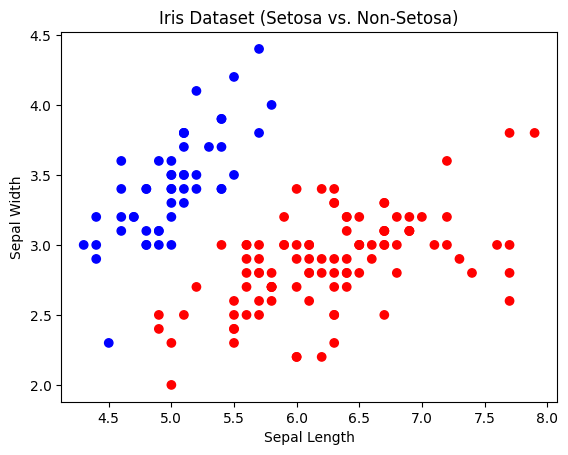

In [51]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

In [52]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


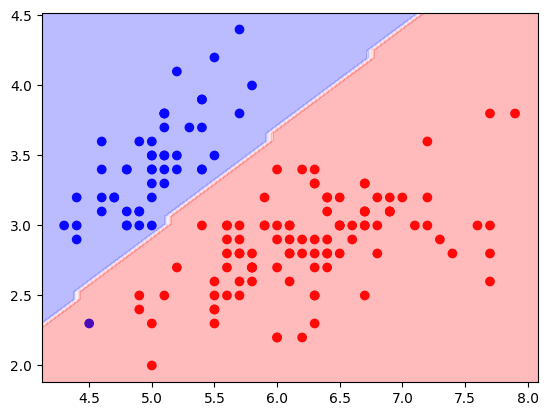

In [53]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, svm)

In [54]:
new_samples = np.array([[0, 0], [4, 4]])
predictions = svm.predict(new_samples)
print(predictions)

[-1. -1.]


Comparing my SVM with the real thing (that already exists in scikit-learn)

In [57]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

print(clf.predict(new_samples))

[-1 -1]


# **Optional: MNIST-C (Corrupted MNIST)**

Loading MNIST dataset...
Visualizing corruptions...


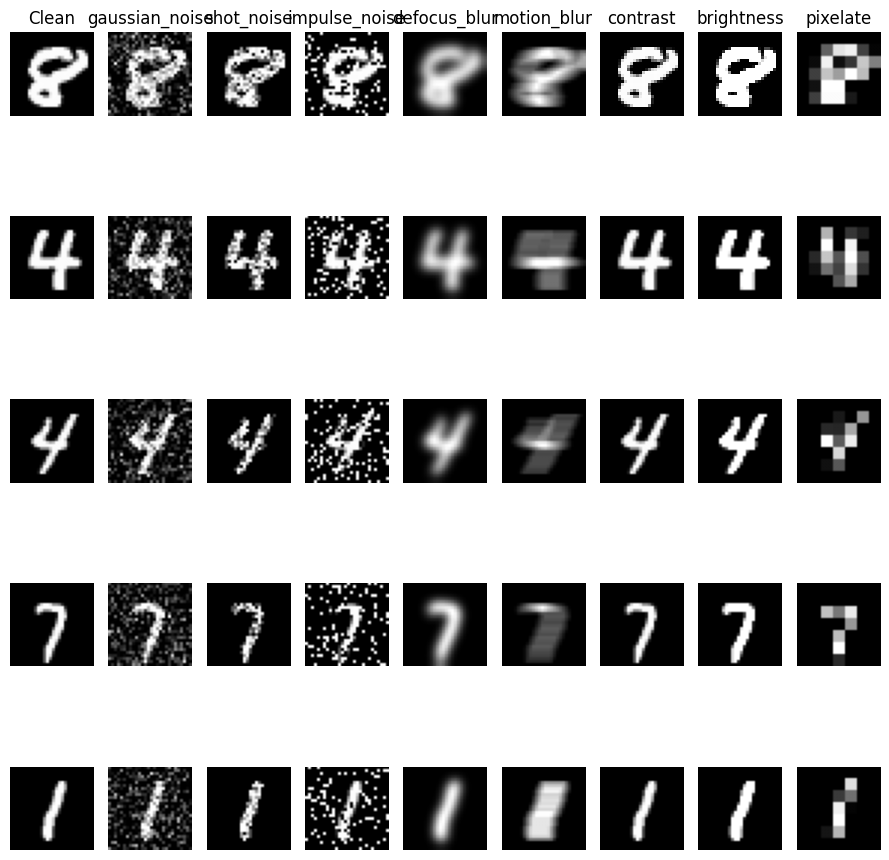

Building and training model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8398 - loss: 0.5130 - val_accuracy: 0.9820 - val_loss: 0.0573
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9708 - loss: 0.0974 - val_accuracy: 0.9877 - val_loss: 0.0427
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9804 - loss: 0.0679 - val_accuracy: 0.9902 - val_loss: 0.0383
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9837 - loss: 0.0540 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9912 - val_loss: 0.0322
Evaluating on corruptions...
Evaluating on gaussian_noise...
Evaluating on shot_noise...
Evaluating on impulse_noise...
Evaluating on defocus_blur...
Evaluating on motion_blur...
Evaluating on contrast...
Evaluating on brightness...
Evaluating on pixelate...
Plotting results...


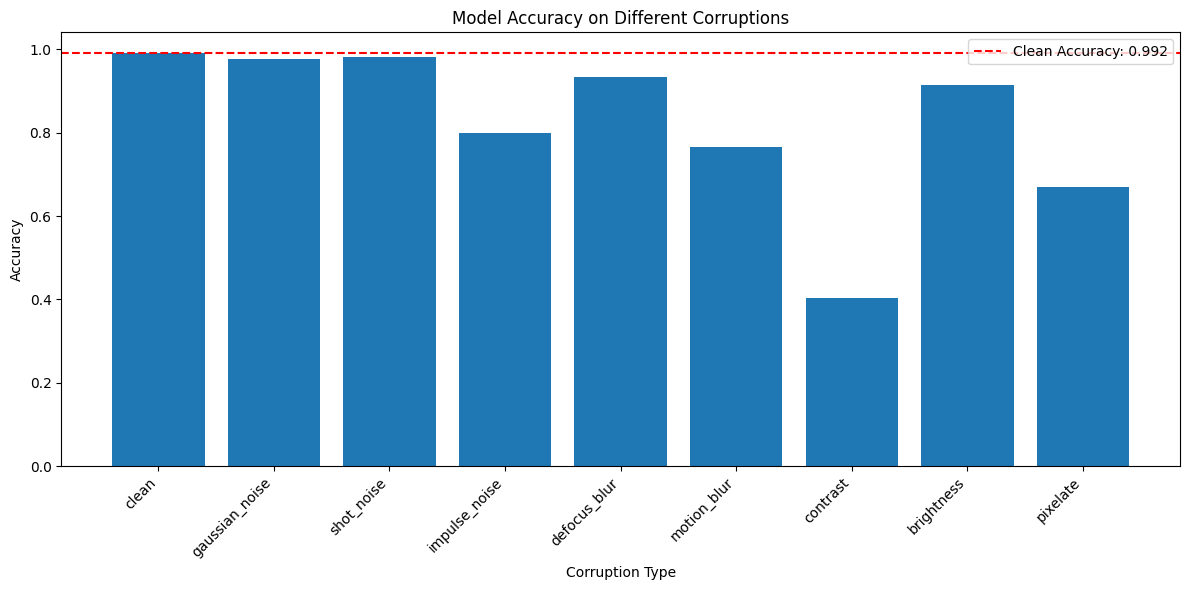


Accuracy Summary:
clean: 0.9915
gaussian_noise: 0.9766
shot_noise: 0.9827
impulse_noise: 0.7986
defocus_blur: 0.9331
motion_blur: 0.7667
contrast: 0.4035
brightness: 0.9147
pixelate: 0.6705


In [58]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
import cv2
import os
import random

# Function to load the standard MNIST dataset
def load_mnist():
    print("Loading MNIST dataset...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Reshape and normalize
    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # One-hot encode labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

# Function to create corrupted versions of MNIST
def create_mnist_c(x, corruption_type, severity=3):
    corrupted_images = np.zeros_like(x)

    for i in range(len(x)):
        img = x[i].squeeze()

        if corruption_type == 'gaussian_noise':
            # Add Gaussian noise
            noise_level = severity * 0.1
            noise = np.random.normal(0, noise_level, img.shape)
            corrupted = img + noise
            corrupted = np.clip(corrupted, 0, 1)

        elif corruption_type == 'shot_noise':
            # Simulate shot noise (Poisson)
            scale = 1.0 / (severity * 0.1 + 0.01)
            corrupted = np.random.poisson(img * scale) / scale
            corrupted = np.clip(corrupted, 0, 1)

        elif corruption_type == 'impulse_noise':
            # Salt and pepper noise
            prob = severity * 0.05
            mask = np.random.random(img.shape) < prob
            corrupted = img.copy()
            corrupted[mask] = 1  # Salt
            mask = np.random.random(img.shape) < prob
            corrupted[mask] = 0  # Pepper

        elif corruption_type == 'defocus_blur':
            # Defocus blur using Gaussian filter
            kernel_size = 2 * severity + 3
            corrupted = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

        elif corruption_type == 'motion_blur':
            # Motion blur
            kernel_size = 2 * severity + 3
            kernel = np.zeros((kernel_size, kernel_size))
            kernel[kernel_size // 2, :] = 1.0 / kernel_size
            corrupted = cv2.filter2D(img, -1, kernel)

        elif corruption_type == 'contrast':
            # Reduce contrast
            factor = severity * 0.3
            corrupted = (img - 0.5) * (1 - factor) + 0.5
            corrupted = np.clip(corrupted, 0, 1)

        elif corruption_type == 'brightness':
            # Increase brightness
            factor = severity * 0.2
            corrupted = img + factor
            corrupted = np.clip(corrupted, 0, 1)

        elif corruption_type == 'pixelate':
            # Pixelate by downsampling and upsampling
            factor = severity + 1
            h, w = img.shape
            temp = cv2.resize(img, (h // factor, w // factor), interpolation=cv2.INTER_LINEAR)
            corrupted = cv2.resize(temp, (h, w), interpolation=cv2.INTER_NEAREST)

        else:
            # Default: pass through original image
            corrupted = img

        corrupted_images[i, :, :, 0] = corrupted

    return corrupted_images

# Function to build a CNN model for MNIST
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train the model
def train_model(model, x_train, y_train, epochs=5, batch_size=64):
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )
    return history

# Function to evaluate model on different corruptions
def evaluate_corruptions(model, x_test, y_test, corruptions):
    results = {}

    # Evaluate on clean data first
    clean_loss, clean_acc = model.evaluate(x_test, y_test, verbose=0)
    results['clean'] = {'accuracy': clean_acc, 'loss': clean_loss}

    # Evaluate on each corruption
    for corruption in corruptions:
        print(f"Evaluating on {corruption}...")
        corrupted_x = create_mnist_c(x_test, corruption)
        loss, acc = model.evaluate(corrupted_x, y_test, verbose=0)
        results[corruption] = {'accuracy': acc, 'loss': loss}

    return results

# Function to visualize corruptions
def visualize_corruptions(x_test, corruptions, num_samples=5):
    # Select random samples
    sample_indices = random.sample(range(len(x_test)), num_samples)
    samples = x_test[sample_indices]

    plt.figure(figsize=(len(corruptions) + 1, num_samples * 2))

    # Plot clean samples in first column
    for i, idx in enumerate(range(num_samples)):
        plt.subplot(num_samples, len(corruptions) + 1, i * (len(corruptions) + 1) + 1)
        plt.imshow(samples[i].squeeze(), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title('Clean')

    # Plot corruptions in subsequent columns
    for j, corruption in enumerate(corruptions):
        corrupted_samples = create_mnist_c(samples, corruption)
        for i in range(num_samples):
            plt.subplot(num_samples, len(corruptions) + 1, i * (len(corruptions) + 1) + j + 2)
            plt.imshow(corrupted_samples[i].squeeze(), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(corruption)

    plt.tight_layout()
    plt.show()

# Function to plot evaluation results
def plot_results(results):
    corruptions = list(results.keys())
    accuracies = [results[c]['accuracy'] for c in corruptions]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(corruptions, accuracies)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Corruption Type')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy on Different Corruptions')
    plt.axhline(y=results['clean']['accuracy'], color='r', linestyle='--',
                label=f'Clean Accuracy: {results["clean"]["accuracy"]:.3f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Define corruptions to test
    corruptions = [
        'gaussian_noise',
        'shot_noise',
        'impulse_noise',
        'defocus_blur',
        'motion_blur',
        'contrast',
        'brightness',
        'pixelate'
    ]

    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = load_mnist()

    # Visualize corruptions
    print("Visualizing corruptions...")
    visualize_corruptions(x_test, corruptions)

    # Build and train model
    print("Building and training model...")
    model = build_model()
    history = train_model(model, x_train, y_train)

    # Evaluate on corruptions
    print("Evaluating on corruptions...")
    results = evaluate_corruptions(model, x_test, y_test, corruptions)

    # Plot results
    print("Plotting results...")
    plot_results(results)

    # Print summary
    print("\nAccuracy Summary:")
    for corruption, metrics in results.items():
        print(f"{corruption}: {metrics['accuracy']:.4f}")

if __name__ == "__main__":
    main()